In [3]:
import pandas as pd
from pprint import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import json

In [108]:
# FILE = "../data/experiments/armnet_10_folds_experiment/checkpoints/dev/10-folds-20250424-084646/armnet_10_folds_experiment_20250424-084646_final_results.json"
FILE = "../data/experiments/armnet_experiment/checkpoints/prod/1-folds-20250424-085427/armnet_experiment_20250424-085427_final_results.json"

# Creating the method

In [109]:
exp_df = pd.read_json(FILE)
exp_df = exp_df.drop(columns=["folds_results"])
exp_df = exp_df.drop_duplicates()
exp_df = exp_df.rename(columns={"duration": "experiment_duration", "identifier": "experiment_identifier"})

exp_df

,experiment_name,epochs,stage,folds,experiment_start_time,experiment_end_time,experiment_duration,experiment_identifier
0,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427


In [110]:
import json

# Open and load the JSON file
with open(FILE, 'r') as file:
    data = json.load(file)


In [23]:
# pd.DataFrame(data["folds_results"])

len(data["folds_results"])


10

In [111]:

for fold_result_idx, fold_result in enumerate(data["folds_results"]):
    # print(fold_result)
    # print(fold_result_idx)

    # Gets the number of epochs
    epochs = len(fold_result['history'][list(fold_result['history'].keys())[0]])
    data["folds_results"][fold_result_idx]['epoch_idx'] = list(range(epochs))
    for x, val in fold_result['history'].items():
        # print(x,val)
        data["folds_results"][fold_result_idx][x] = val


for fold_result_idx, fold_result in enumerate(data["folds_results"]):
    print(fold_result_idx, fold_result)


0 {'fold': 'fold-1', 'history': {'accuracy': [0.3884026110172272, 0.6660831570625305, 0.7505470514297485, 0.7695842385292053, 0.7890591025352478, 0.8417943120002747, 0.8461706638336182, 0.7693654298782349, 0.8452954292297363, 0.8689277768135071, 0.8862144351005554, 0.7947483658790588, 0.8822757005691528, 0.9096280336380005, 0.920131266117096, 0.9135667681694031, 0.9234135746955872, 0.9363238215446472, 0.9413566589355469, 0.9542669653892517, 0.9549233913421631, 0.9612691402435303, 0.9652078747749329, 0.963238537311554, 0.9601750373840332, 0.9634573459625244, 0.9614879488945007, 0.9728665351867676, 0.9597374200820923, 0.9636761546134949, 0.9695842266082764, 0.9678336977958679, 0.939387321472168, 0.9733041524887085, 0.9617067575454712, 0.857549250125885, 0.9415754675865173, 0.9334791898727417, 0.9586433172225952, 0.9706783294677734, 0.9728665351867676, 0.9783369898796082, 0.981838047504425, 0.9796499013900757, 0.9772428870201111, 0.9803063273429871, 0.9702407121658325, 0.9809628129005432,

In [115]:
folds_results = pd.DataFrame(data["folds_results"])
folds_results = folds_results.drop(columns=["history"])
# for i in data["folds_results"]:
#     for i in
#     print(i['history'])
# folds_results = folds_results.rename(columns={"identifier": "experiment_identifier", "duration": "experiment_duration"})
folds_results

,fold,start_time,end_time,duration,identifier,epoch_idx,accuracy,f1_score,loss,precision,val_accuracy,val_f1_score,val_loss,val_precision
0,fold-1,2025-04-24T08:54:27.526792,2025-04-24T08:58:11.829697,224.302905,20250424-085427,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.3884026110172272, 0.6660831570625305, 0.750...","[0.2705385088920593, 0.5782166719436646, 0.714...","[5.777287483215332, 0.8201620578765869, 0.6539...","[0.4104854464530945, 0.7678452134132385, 0.805...","[0.5709282159805298, 0.6943957805633545, 0.736...","[0.40302175283432007, 0.6030705571174622, 0.69...","[0.9905147552490234, 0.7950044870376587, 0.696...","[0.751838207244873, 0.7638072967529297, 0.7879..."


In [ ]:
result = pd.merge(exp_df, folds_results, how="cross")
result = result.explode(['epoch_idx', 'accuracy', 'f1_score', 'loss', 'precision', 'val_accuracy', 'val_f1_score', 'val_loss', 'val_precision']).reset_index(drop=True)

result

,experiment_name,epochs,stage,folds,experiment_start_time,experiment_end_time,experiment_duration,experiment_identifier,fold,start_time,...,identifier,epoch_idx,accuracy,f1_score,loss,precision,val_accuracy,val_f1_score,val_loss,val_precision
0,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427,fold-1,2025-04-24T08:54:27.526792,...,20250424-085427,0,0.388403,0.270539,5.777287,0.410485,0.570928,0.403022,0.990515,0.751838
1,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427,fold-1,2025-04-24T08:54:27.526792,...,20250424-085427,1,0.666083,0.578217,0.820162,0.767845,0.694396,0.603071,0.795004,0.763807
2,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427,fold-1,2025-04-24T08:54:27.526792,...,20250424-085427,2,0.750547,0.714656,0.653962,0.805519,0.736427,0.69388,0.696073,0.787942
3,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427,fold-1,2025-04-24T08:54:27.526792,...,20250424-085427,3,0.769584,0.746002,0.590538,0.81264,0.744308,0.709898,0.670302,0.779441
4,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427,fold-1,2025-04-24T08:54:27.526792,...,20250424-085427,4,0.789059,0.770275,0.548067,0.824583,0.808231,0.801256,0.516867,0.830841
5,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427,fold-1,2025-04-24T08:54:27.526792,...,20250424-085427,5,0.841794,0.827488,0.44089,0.863361,0.819615,0.819793,0.474987,0.844156
6,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427,fold-1,2025-04-24T08:54:27.526792,...,20250424-085427,6,0.846171,0.834389,0.431079,0.864852,0.754816,0.714929,0.585627,0.783862
7,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427,fold-1,2025-04-24T08:54:27.526792,...,20250424-085427,7,0.769365,0.755618,0.586785,0.805736,0.80648,0.799393,0.481248,0.841556
8,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427,fold-1,2025-04-24T08:54:27.526792,...,20250424-085427,8,0.845295,0.834912,0.415093,0.862948,0.870403,0.863585,0.36183,0.881341
9,armnet_experiment,50,prod,1,2025-04-24 08:54:27.526765,2025-04-24 08:58:11.831617,224.304852,20250424-085427,fold-1,2025-04-24T08:54:27.526792,...,20250424-085427,9,0.868928,0.86126,0.349331,0.884101,0.867776,0.86149,0.373684,0.879529


In [86]:
result.columns

Index(['experiment_name', 'epochs', 'stage', 'folds', 'experiment_start_time',
       'experiment_end_time', 'experiment_duration_x',
       'experiment_identifier_x', 'fold', 'start_time', 'end_time',
       'experiment_duration_y', 'experiment_identifier_y', 'accuracy',
       'f1_score', 'loss', 'precision', 'val_accuracy', 'val_f1_score',
       'val_loss', 'val_precision'],
      dtype='object')

In [ ]:
df_exploded = result.explode(['accuracy', 'f1_score', 'loss', 'precision', 'val_accuracy', 'val_f1_score', 'val_loss', 'val_precision'])

df_exploded

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
Name: epochs, dtype: int64

<Axes: xlabel='epoch_idx', ylabel='val_loss'>

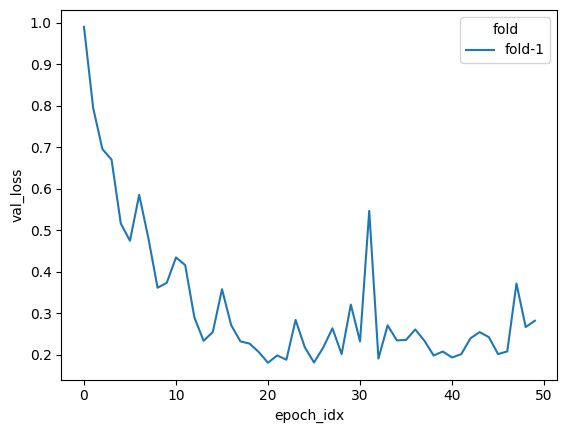

In [114]:
sns.lineplot(data=result, x="epoch_idx", y="val_loss", hue="fold")

# Testing the method

In [15]:
def build_results_dataframe(json_file)-> pd.DataFrame:
    """
    Build a results dataframe from a JSON file.
    """

    # Open and load the JSON file
    with open(json_file, 'r') as file:
        data = json.load(file)
    
    # Gets the data related to the experiment
    exp_df = pd.read_json(json_file)
    exp_df = exp_df.drop(columns=["folds_results"])
    exp_df = exp_df.drop_duplicates()
    exp_df = exp_df.rename(columns={"duration": "experiment_duration", "identifier": "experiment_identifier"})

    
    # Extracts the folds results into the dict
    for fold_result_idx, fold_result in enumerate(data["folds_results"]):
        # Gets the number of epochs
        epochs = len(fold_result['history'][list(fold_result['history'].keys())[0]])
        data["folds_results"][fold_result_idx]['epoch_idx'] = list(range(epochs))
        for x, val in fold_result['history'].items():
            data["folds_results"][fold_result_idx][x] = val

    evaluate_results_list = [x | {"fold": i['fold']}  for i in data["folds_results"] if "evaluate_results" in i for x in i["evaluate_results"]]

    evaluate_results = pd.DataFrame(evaluate_results_list)
    evaluate_results = evaluate_results.astype({"convergence_epoch": "int"})
    evaluate_results = evaluate_results.rename(
        columns={
            "convergence_epoch": "epoch_idx",
            "loss": "evaluate_loss",
        })

    # Creates the folds results dataframe
    folds_results = pd.DataFrame(data["folds_results"])
    folds_results = folds_results.drop(columns=["history"])
    # folds_results = folds_results.rename(columns={"identifier": "experiment_identifier", "duration": "experiment_duration"})
    
    result = pd.merge(exp_df, folds_results, how="cross")
    result = result.explode(['epoch_idx', 'accuracy', 'f1_score', 'loss', 'precision', 'val_accuracy', 'val_f1_score', 'val_loss', 'val_precision']).reset_index(drop=True)
    result = pd.merge(result, evaluate_results, on=["fold", "epoch_idx"], how="left")

    return result

def generate_plots():
    pass

In [32]:
json_file = "../data/experiments/armnet_10_folds_experiment/checkpoints/prod/10-folds-20250427-072856/armnet_10_folds_experiment_20250427-072856_final_results_evaluate.json"
# Open and load the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

# Gets the data related to the experiment
exp_df = pd.read_json(json_file)
exp_df = exp_df.drop(columns=["folds_results"])
exp_df = exp_df.drop_duplicates()
exp_df = exp_df.rename(columns={"duration": "experiment_duration", "identifier": "experiment_identifier"})


# Extracts the folds results into the dict
for fold_result_idx, fold_result in enumerate(data["folds_results"]):
    # Gets the number of epochs
    epochs = len(fold_result['history'][list(fold_result['history'].keys())[0]])
    data["folds_results"][fold_result_idx]['epoch_idx'] = list(range(epochs))
    for x, val in fold_result['history'].items():
        data["folds_results"][fold_result_idx][x] = val

evaluate_results_list = [x | {"fold": i['fold']}  for i in data["folds_results"] if "evaluate_results" in i for x in i["evaluate_results"]]

for i in evaluate_results_list:
    print(i)


evaluate_results = pd.DataFrame(evaluate_results_list)
evaluate_results = evaluate_results.astype({"convergence_epoch": "int"})
evaluate_results = evaluate_results.rename(
    columns={
        "convergence_epoch": "epoch_idx",
        "loss": "evaluate_loss",
    })

# Creates the folds results dataframe
folds_results = pd.DataFrame(data["folds_results"])
folds_results = folds_results.drop(columns=["history", "evaluate_results"])
# folds_results = folds_results.rename(columns={"identifier": "experiment_identifier", "duration": "experiment_duration"})

result = pd.merge(exp_df, folds_results, how="cross")
result = result.explode(['epoch_idx', 'accuracy', 'f1_score', 'loss', 'precision', 'val_accuracy', 'val_f1_score', 'val_loss', 'val_precision']).reset_index(drop=True)
result = pd.merge(result, evaluate_results, on=["fold", "epoch_idx"], how="left")
# evaluate_results
display(evaluate_results)
display(result[result["weight_path"].notna()])

{'convergence_epoch': '0045', 'weight_path': './data/experiments/armnet_10_folds_experiment/checkpoints/prod/10-folds-20250427-072856/fold-1-20250427-072856/model/armnet_10_folds_experiment-best-val-0045.weights.h5', 'loss': 0.14850538969039917, 'f1_class_0': 0.955932080745697, 'f1_class_1': 0.9483870267868042, 'f1_class_2': 0.9963098764419556, 'f1_class_3': 0.9916526675224304, 'fold': 'fold-1'}
{'convergence_epoch': '0006', 'weight_path': './data/experiments/armnet_10_folds_experiment/checkpoints/prod/10-folds-20250427-072856/fold-2-20250427-073315/model/armnet_10_folds_experiment-best-val-0006.weights.h5', 'loss': 0.10976959764957428, 'f1_class_0': 0.955932080745697, 'f1_class_1': 0.9451612234115601, 'f1_class_2': 0.9962916374206543, 'f1_class_3': 0.9867109656333923, 'fold': 'fold-2'}
{'convergence_epoch': '0010', 'weight_path': './data/experiments/armnet_10_folds_experiment/checkpoints/prod/10-folds-20250427-072856/fold-3-20250427-073716/model/armnet_10_folds_experiment-best-val-001

,epoch_idx,weight_path,evaluate_loss,f1_class_0,f1_class_1,f1_class_2,f1_class_3,fold
0,45,./data/experiments/armnet_10_folds_experiment/...,0.148505,0.955932,0.948387,0.996310,0.991653,fold-1
1,6,./data/experiments/armnet_10_folds_experiment/...,0.109770,0.955932,0.945161,0.996292,0.986711,fold-2
2,10,./data/experiments/armnet_10_folds_experiment/...,0.134793,0.959596,0.956381,1.000000,0.991653,fold-3
3,2,./data/experiments/armnet_10_folds_experiment/...,0.101983,0.967959,0.959350,0.995037,0.983553,fold-4
4,5,./data/experiments/armnet_10_folds_experiment/...,0.102638,0.968067,0.964169,0.997537,0.991681,fold-5
5,9,./data/experiments/armnet_10_folds_experiment/...,0.127161,0.973422,0.967213,0.997531,0.993333,fold-6
6,10,./data/experiments/armnet_10_folds_experiment/...,0.175878,0.949664,0.938111,0.995074,0.986667,fold-7
7,2,./data/experiments/armnet_10_folds_experiment/...,0.136304,0.969491,0.953150,0.993850,0.986667,fold-8
8,2,./data/experiments/armnet_10_folds_experiment/...,0.170876,0.974874,0.953642,0.993850,0.983553,fold-9
9,2,./data/experiments/armnet_10_folds_experiment/...,0.218308,0.969595,0.944532,0.990025,0.984925,fold-10


,experiment_name,epochs,stage,folds,experiment_start_time,experiment_end_time,experiment_duration,experiment_identifier,fold,start_time,...,val_accuracy,val_f1_score,val_loss,val_precision,weight_path,evaluate_loss,f1_class_0,f1_class_1,f1_class_2,f1_class_3
45,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-1,2025-04-27T07:28:56.951948,...,0.97373,0.973968,0.161439,0.97373,./data/experiments/armnet_10_folds_experiment/...,0.148505,0.955932,0.948387,0.996310,0.991653
56,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-2,2025-04-27T07:33:15.481885,...,0.984238,0.984576,0.057988,0.985965,./data/experiments/armnet_10_folds_experiment/...,0.109770,0.955932,0.945161,0.996292,0.986711
110,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-3,2025-04-27T07:37:16.066733,...,1.0,1.0,0.003026,1.0,./data/experiments/armnet_10_folds_experiment/...,0.134793,0.959596,0.956381,1.000000,0.991653
152,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-4,2025-04-27T07:41:20.152666,...,0.994746,0.994493,0.013942,0.994746,./data/experiments/armnet_10_folds_experiment/...,0.101983,0.967959,0.959350,0.995037,0.983553
205,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-5,2025-04-27T07:45:19.970847,...,1.0,1.0,0.002028,1.0,./data/experiments/armnet_10_folds_experiment/...,0.102638,0.968067,0.964169,0.997537,0.991681
259,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-6,2025-04-27T07:49:18.530411,...,1.0,1.0,0.000177,1.0,./data/experiments/armnet_10_folds_experiment/...,0.127161,0.973422,0.967213,0.997531,0.993333
310,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-7,2025-04-27T07:53:18.486605,...,0.970228,0.967981,0.146074,0.970228,./data/experiments/armnet_10_folds_experiment/...,0.175878,0.949664,0.938111,0.995074,0.986667
352,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-8,2025-04-27T07:57:17.879143,...,0.994755,0.994366,0.020966,0.994755,./data/experiments/armnet_10_folds_experiment/...,0.136304,0.969491,0.953150,0.993850,0.986667
402,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-9,2025-04-27T08:01:17.856907,...,1.0,1.0,0.000676,1.0,./data/experiments/armnet_10_folds_experiment/...,0.170876,0.974874,0.953642,0.993850,0.983553
452,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-10,2025-04-27T08:05:18.610143,...,0.989492,0.989813,0.045347,0.989492,./data/experiments/armnet_10_folds_experiment/...,0.218308,0.969595,0.944532,0.990025,0.984925


In [33]:
FILES = {
    'armnet_experiment': "../data/experiments/armnet_experiment/checkpoints/prod/1-folds-20250427-072427/armnet_experiment_20250427-072427_final_results_evaluate.json",
    'armnet_10_folds_experiment': "../data/experiments/armnet_10_folds_experiment/checkpoints/prod/10-folds-20250427-072856/armnet_10_folds_experiment_20250427-072856_final_results_evaluate.json",
    'resnet_experiment': "../data/experiments/resnet_experiment/checkpoints/prod/1-folds-20250427-081026/resnet_experiment_20250427-081026_final_results_evaluate.json",
    'resnet_10_folds_experiment': "../data/experiments/resnet_10_folds_experiment/checkpoints/prod/10-folds-20250427-190913/resnet_10_folds_experiment_20250427-190913_final_results_evaluate.json"
}

df_a_10f = build_results_dataframe(FILES['armnet_10_folds_experiment'])
df_a_1f = build_results_dataframe(FILES['armnet_experiment'])
df_r_10f = build_results_dataframe(FILES['resnet_10_folds_experiment'])
df_r_1f = build_results_dataframe(FILES['resnet_experiment'])

full_data = pd.concat([df_a_10f, df_a_1f, df_r_10f, df_r_1f], ignore_index=True)
full_data_a = pd.concat([df_a_10f, df_a_1f], ignore_index=True)
full_data_r = pd.concat([df_r_10f, df_r_1f], ignore_index=True)

df_a_10f.columns

Index(['experiment_name', 'epochs', 'stage', 'folds', 'experiment_start_time',
       'experiment_end_time', 'experiment_duration', 'experiment_identifier',
       'fold', 'start_time', 'end_time', 'duration', 'identifier',
       'evaluate_results', 'epoch_idx', 'accuracy', 'f1_score', 'loss',
       'precision', 'val_accuracy', 'val_f1_score', 'val_loss',
       'val_precision', 'weight_path', 'evaluate_loss', 'f1_class_0',
       'f1_class_1', 'f1_class_2', 'f1_class_3'],
      dtype='object')

In [18]:
df_a_10f[df_a_10f["weight_path"].notna()]

,experiment_name,epochs,stage,folds,experiment_start_time,experiment_end_time,experiment_duration,experiment_identifier,fold,start_time,...,f1_score,loss,precision,val_accuracy,val_f1_score,val_loss,val_precision,weight_path,evaluate_loss,compile_metric
45,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-1,2025-04-27T07:28:56.951948,...,1.0,0.000037,1.0,0.97373,0.973968,0.161439,0.97373,./data/experiments/armnet_10_folds_experiment/...,0.148482,0.973070
56,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-2,2025-04-27T07:33:15.481885,...,0.995467,0.013071,0.99572,0.984238,0.984576,0.057988,0.985965,./data/experiments/armnet_10_folds_experiment/...,0.109816,0.971024
110,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-3,2025-04-27T07:37:16.066733,...,1.0,0.000026,1.0,1.0,1.0,0.003026,1.0,./data/experiments/armnet_10_folds_experiment/...,0.134783,0.976907
152,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-4,2025-04-27T07:41:20.152666,...,0.994574,0.023609,0.994748,0.994746,0.994493,0.013942,0.994746,./data/experiments/armnet_10_folds_experiment/...,0.101995,0.976475
205,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-5,2025-04-27T07:45:19.970847,...,0.99939,0.002857,0.999416,1.0,1.0,0.002028,1.0,./data/experiments/armnet_10_folds_experiment/...,0.102629,0.980363
259,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-6,2025-04-27T07:49:18.530411,...,0.9996,0.001132,0.999611,1.0,1.0,0.000177,1.0,./data/experiments/armnet_10_folds_experiment/...,0.127159,0.982875
310,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-7,2025-04-27T07:53:18.486605,...,0.988652,0.034953,0.989107,0.970228,0.967981,0.146074,0.970228,./data/experiments/armnet_10_folds_experiment/...,0.175892,0.967379
352,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-8,2025-04-27T07:57:17.879143,...,0.990773,0.046443,0.991051,0.994755,0.994366,0.020966,0.994755,./data/experiments/armnet_10_folds_experiment/...,0.136307,0.975790
402,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-9,2025-04-27T08:01:17.856907,...,0.999189,0.002964,0.999222,1.0,1.0,0.000676,1.0,./data/experiments/armnet_10_folds_experiment/...,0.170871,0.976480
452,armnet_10_folds_experiment,50,prod,10,2025-04-27 07:28:56.951921,2025-04-27 08:09:18.282170,2421.330249,20250427-072856,fold-10,2025-04-27T08:05:18.610143,...,0.994358,0.015276,0.994554,0.989492,0.989813,0.045347,0.989492,./data/experiments/armnet_10_folds_experiment/...,0.218281,0.972269


In [39]:
print(sns.color_palette("pastel6",10).as_hex())

colors = sns.color_palette("pastel6",10).as_hex()
colorsA = sns.color_palette("pastel6",10).as_hex()
colorsB = sns.color_palette("pastel6",10).as_hex()
# https://seaborn.pydata.org/generated/seaborn.color_palette.html

['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0', '#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff']


# F1-Score

## ARM-Net

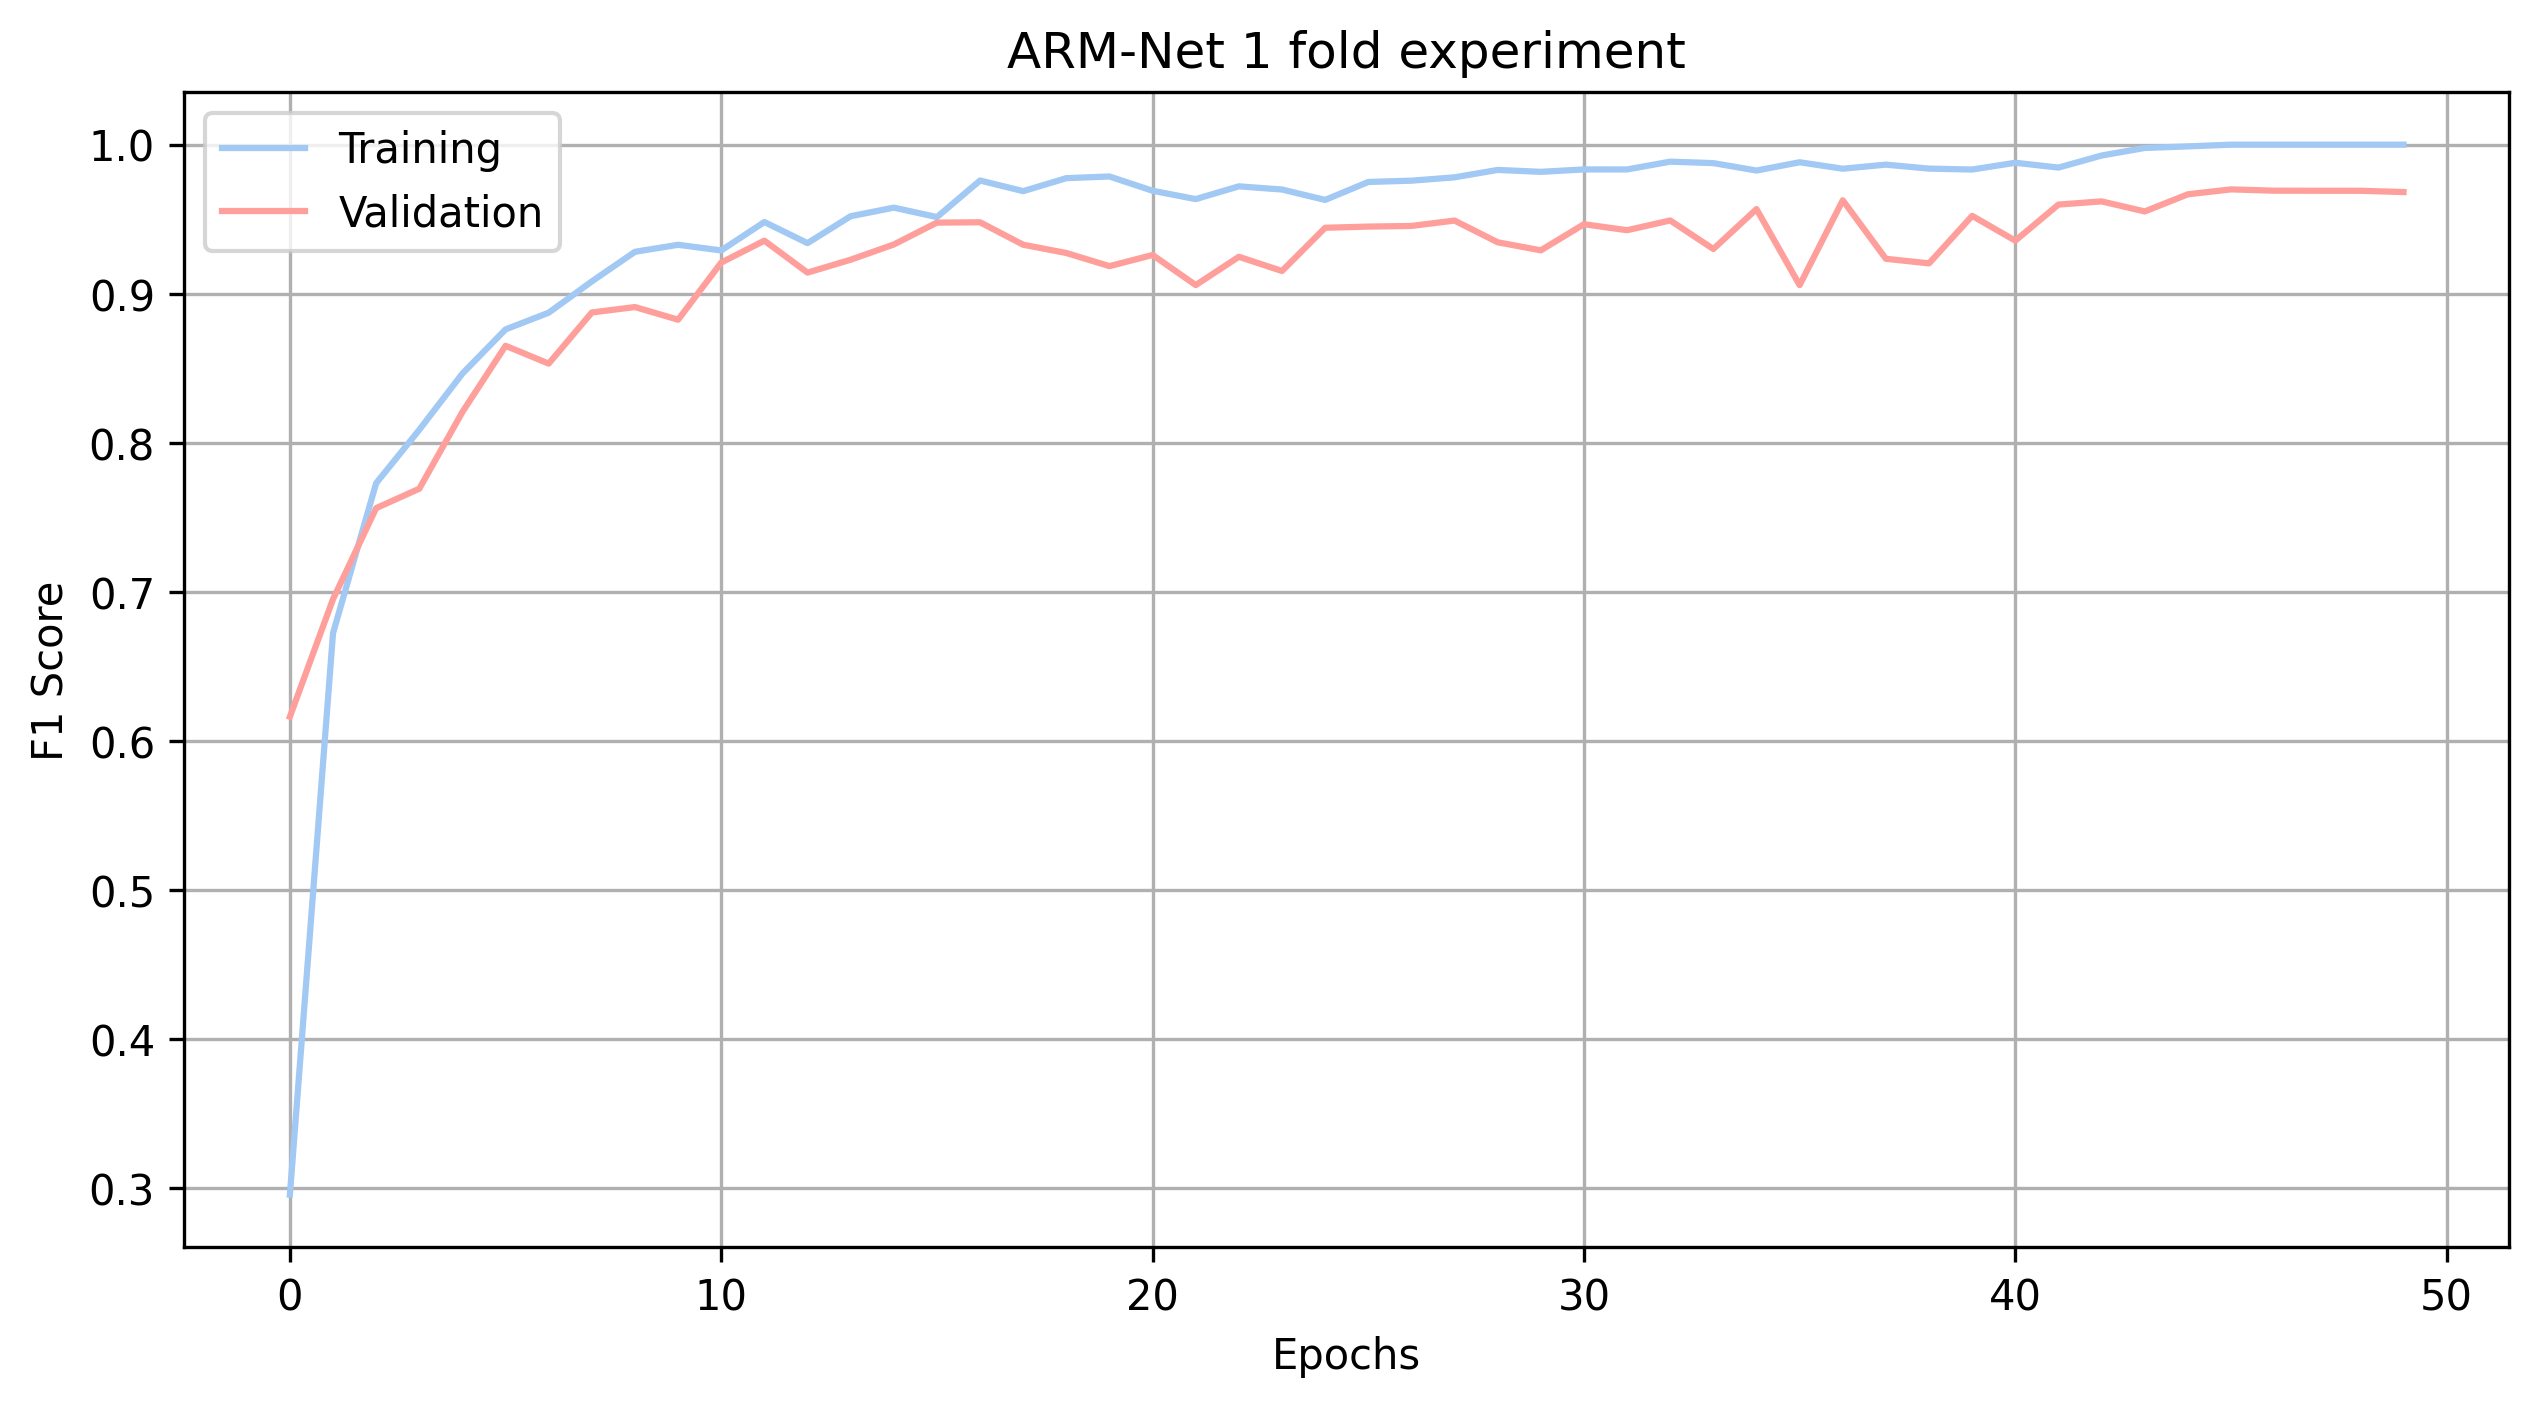

In [65]:
plt.figure(dpi=300, figsize=(10, 5))
sns.lineplot(data=df_a_1f, x="epoch_idx", y="f1_score", color=colors[0], label="Training")
sns.lineplot(data=df_a_1f, x="epoch_idx", y="val_f1_score", color=colors[8], label="Validation")
plt.grid()
plt.title("ARM-Net 1 fold experiment")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.savefig("imgs/armnet_1_fold_experiment_f1_score.png", bbox_inches='tight')#, pad_inches=0.2)

In [66]:
plt.figure(dpi=300, figsize=(10, 5))
sns.lineplot(data=df_a_10f, x="epoch_idx", y="accuracy", color=colors[0], label="Training")
sns.lineplot(data=df_a_10f, x="epoch_idx", y="val_accuracy", color=colors[8], label="Validation")
plt.grid()
plt.title("ARM-Net experiment (10 folds)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("imgs/armnet_10_folds_experiment_accuracy.png", bbox_inches='tight')
plt.close()

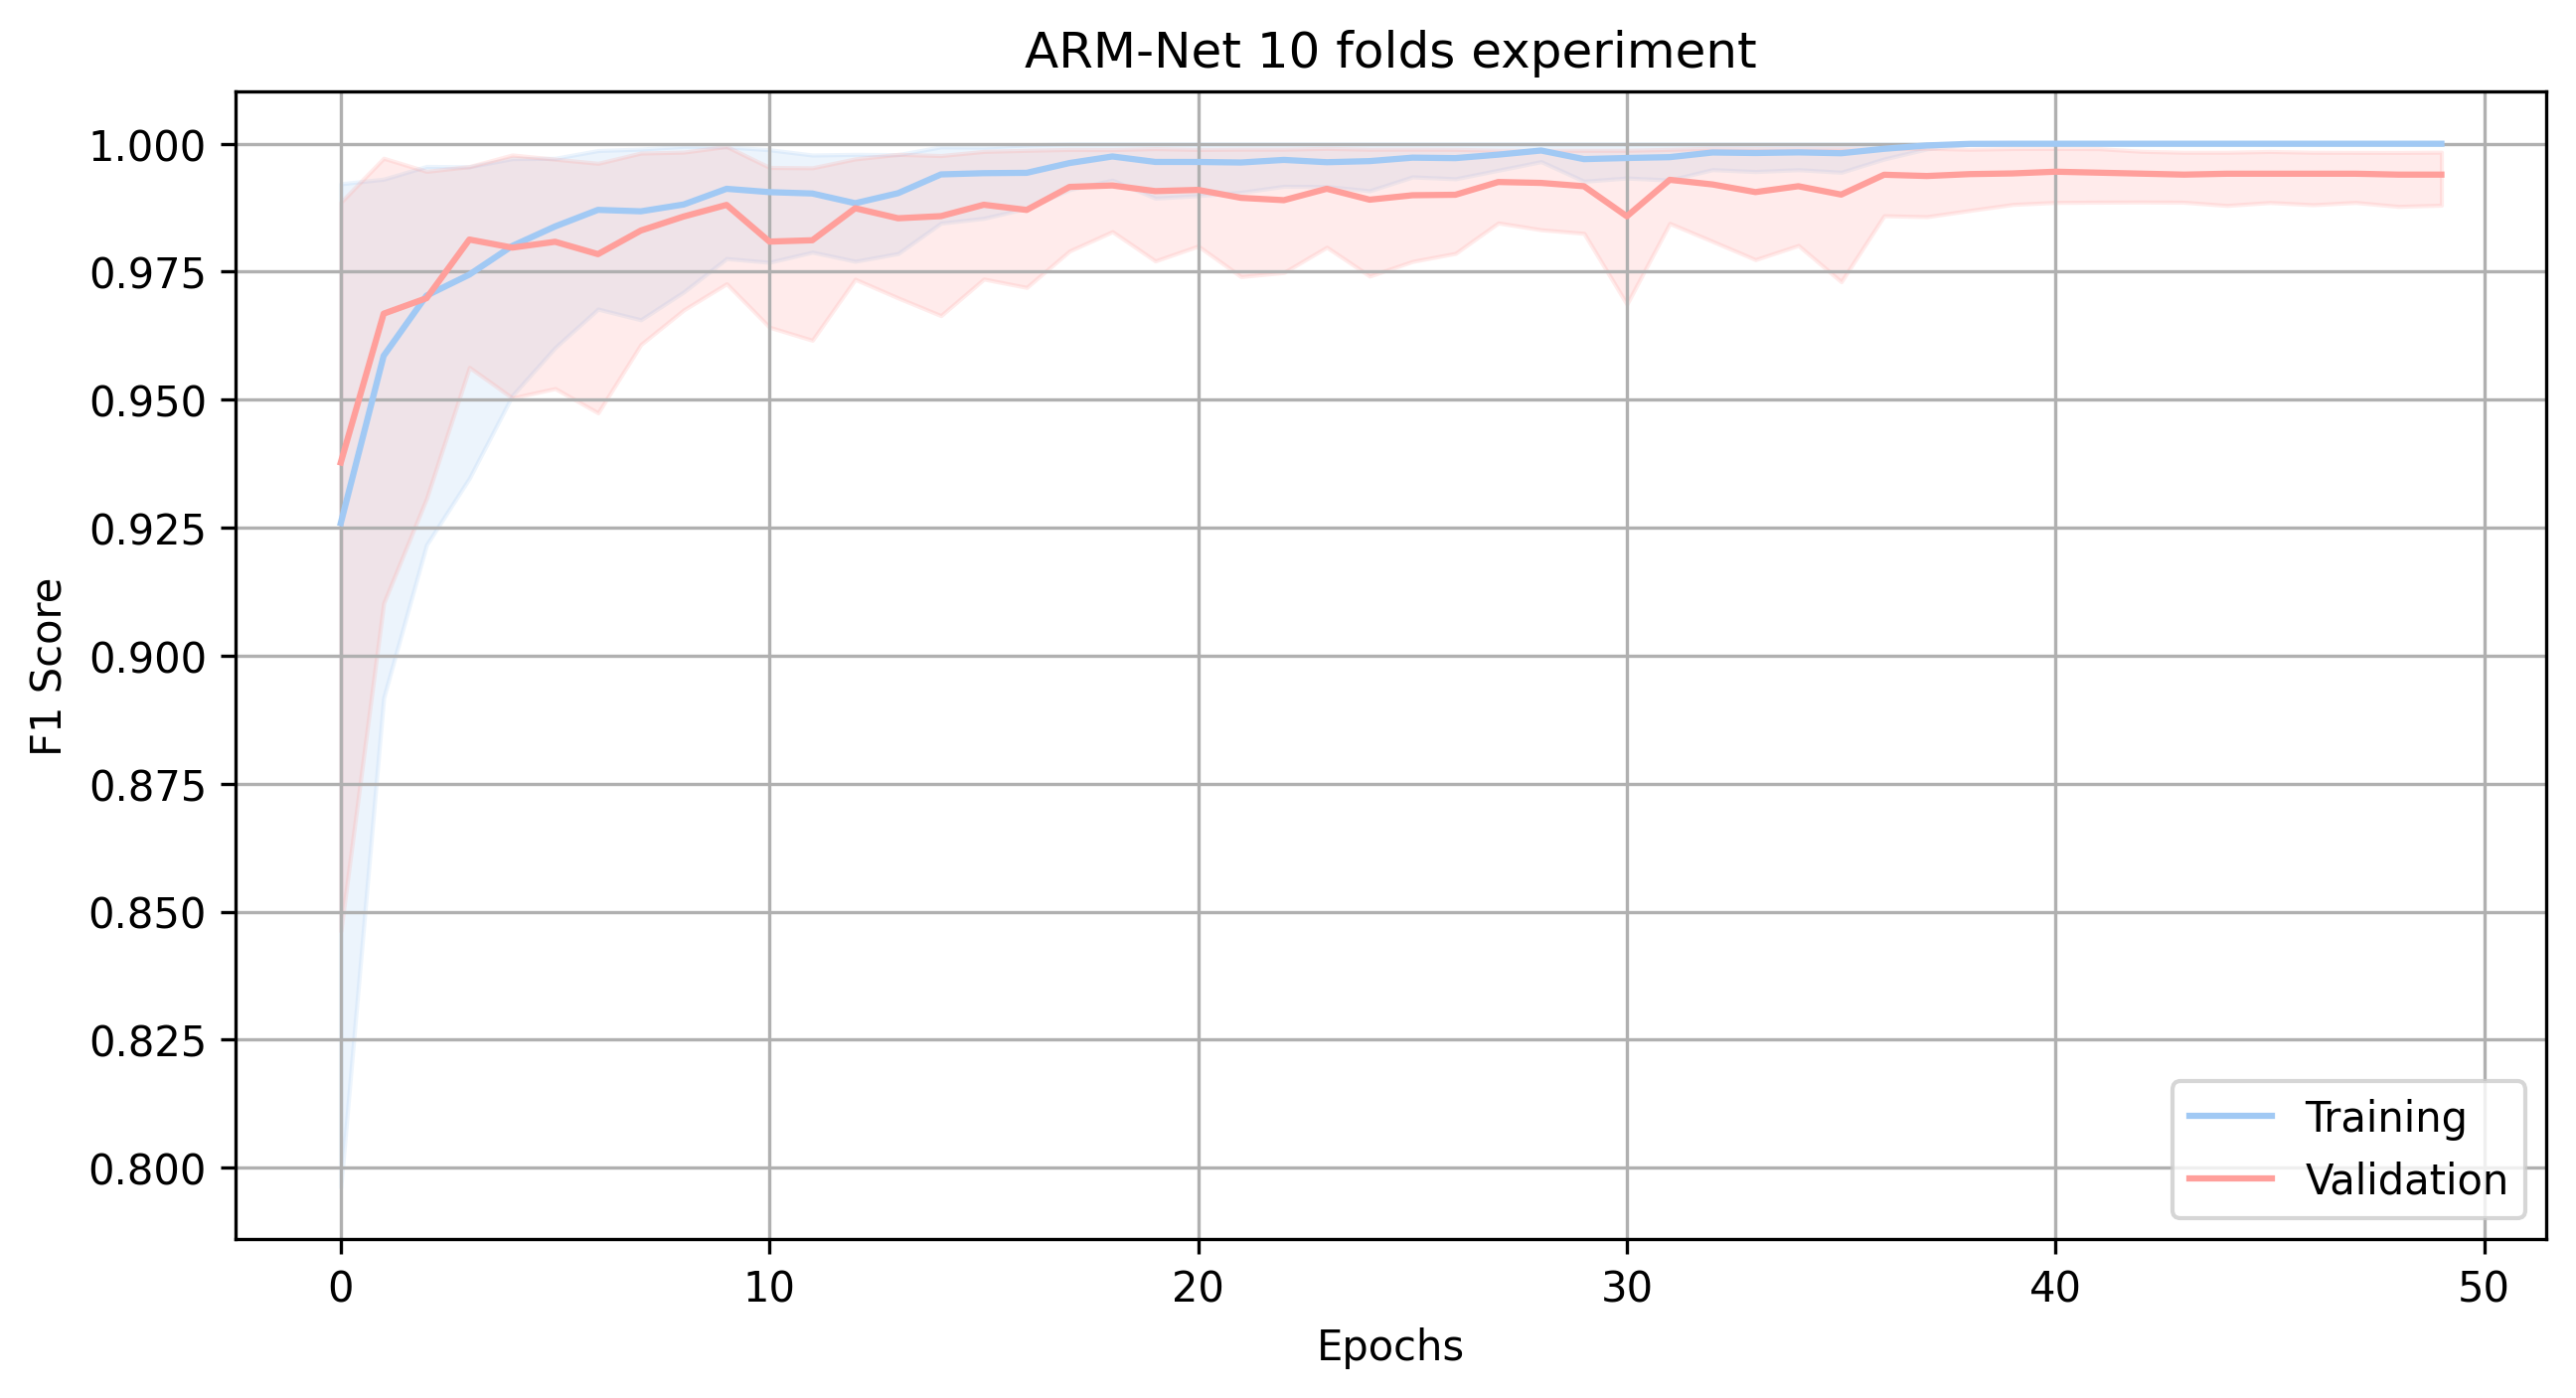

In [67]:
plt.figure(dpi=300, figsize=(10, 5))
sns.lineplot(data=df_a_10f, x="epoch_idx", y="f1_score", color=colors[0], label="Training")
sns.lineplot(data=df_a_10f, x="epoch_idx", y="val_f1_score", color=colors[8], label="Validation")
plt.grid()
plt.title("ARM-Net 10 folds experiment")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.savefig("imgs/armnet_10_folds_experiment_f1_score.png", bbox_inches='tight')

## ResNet

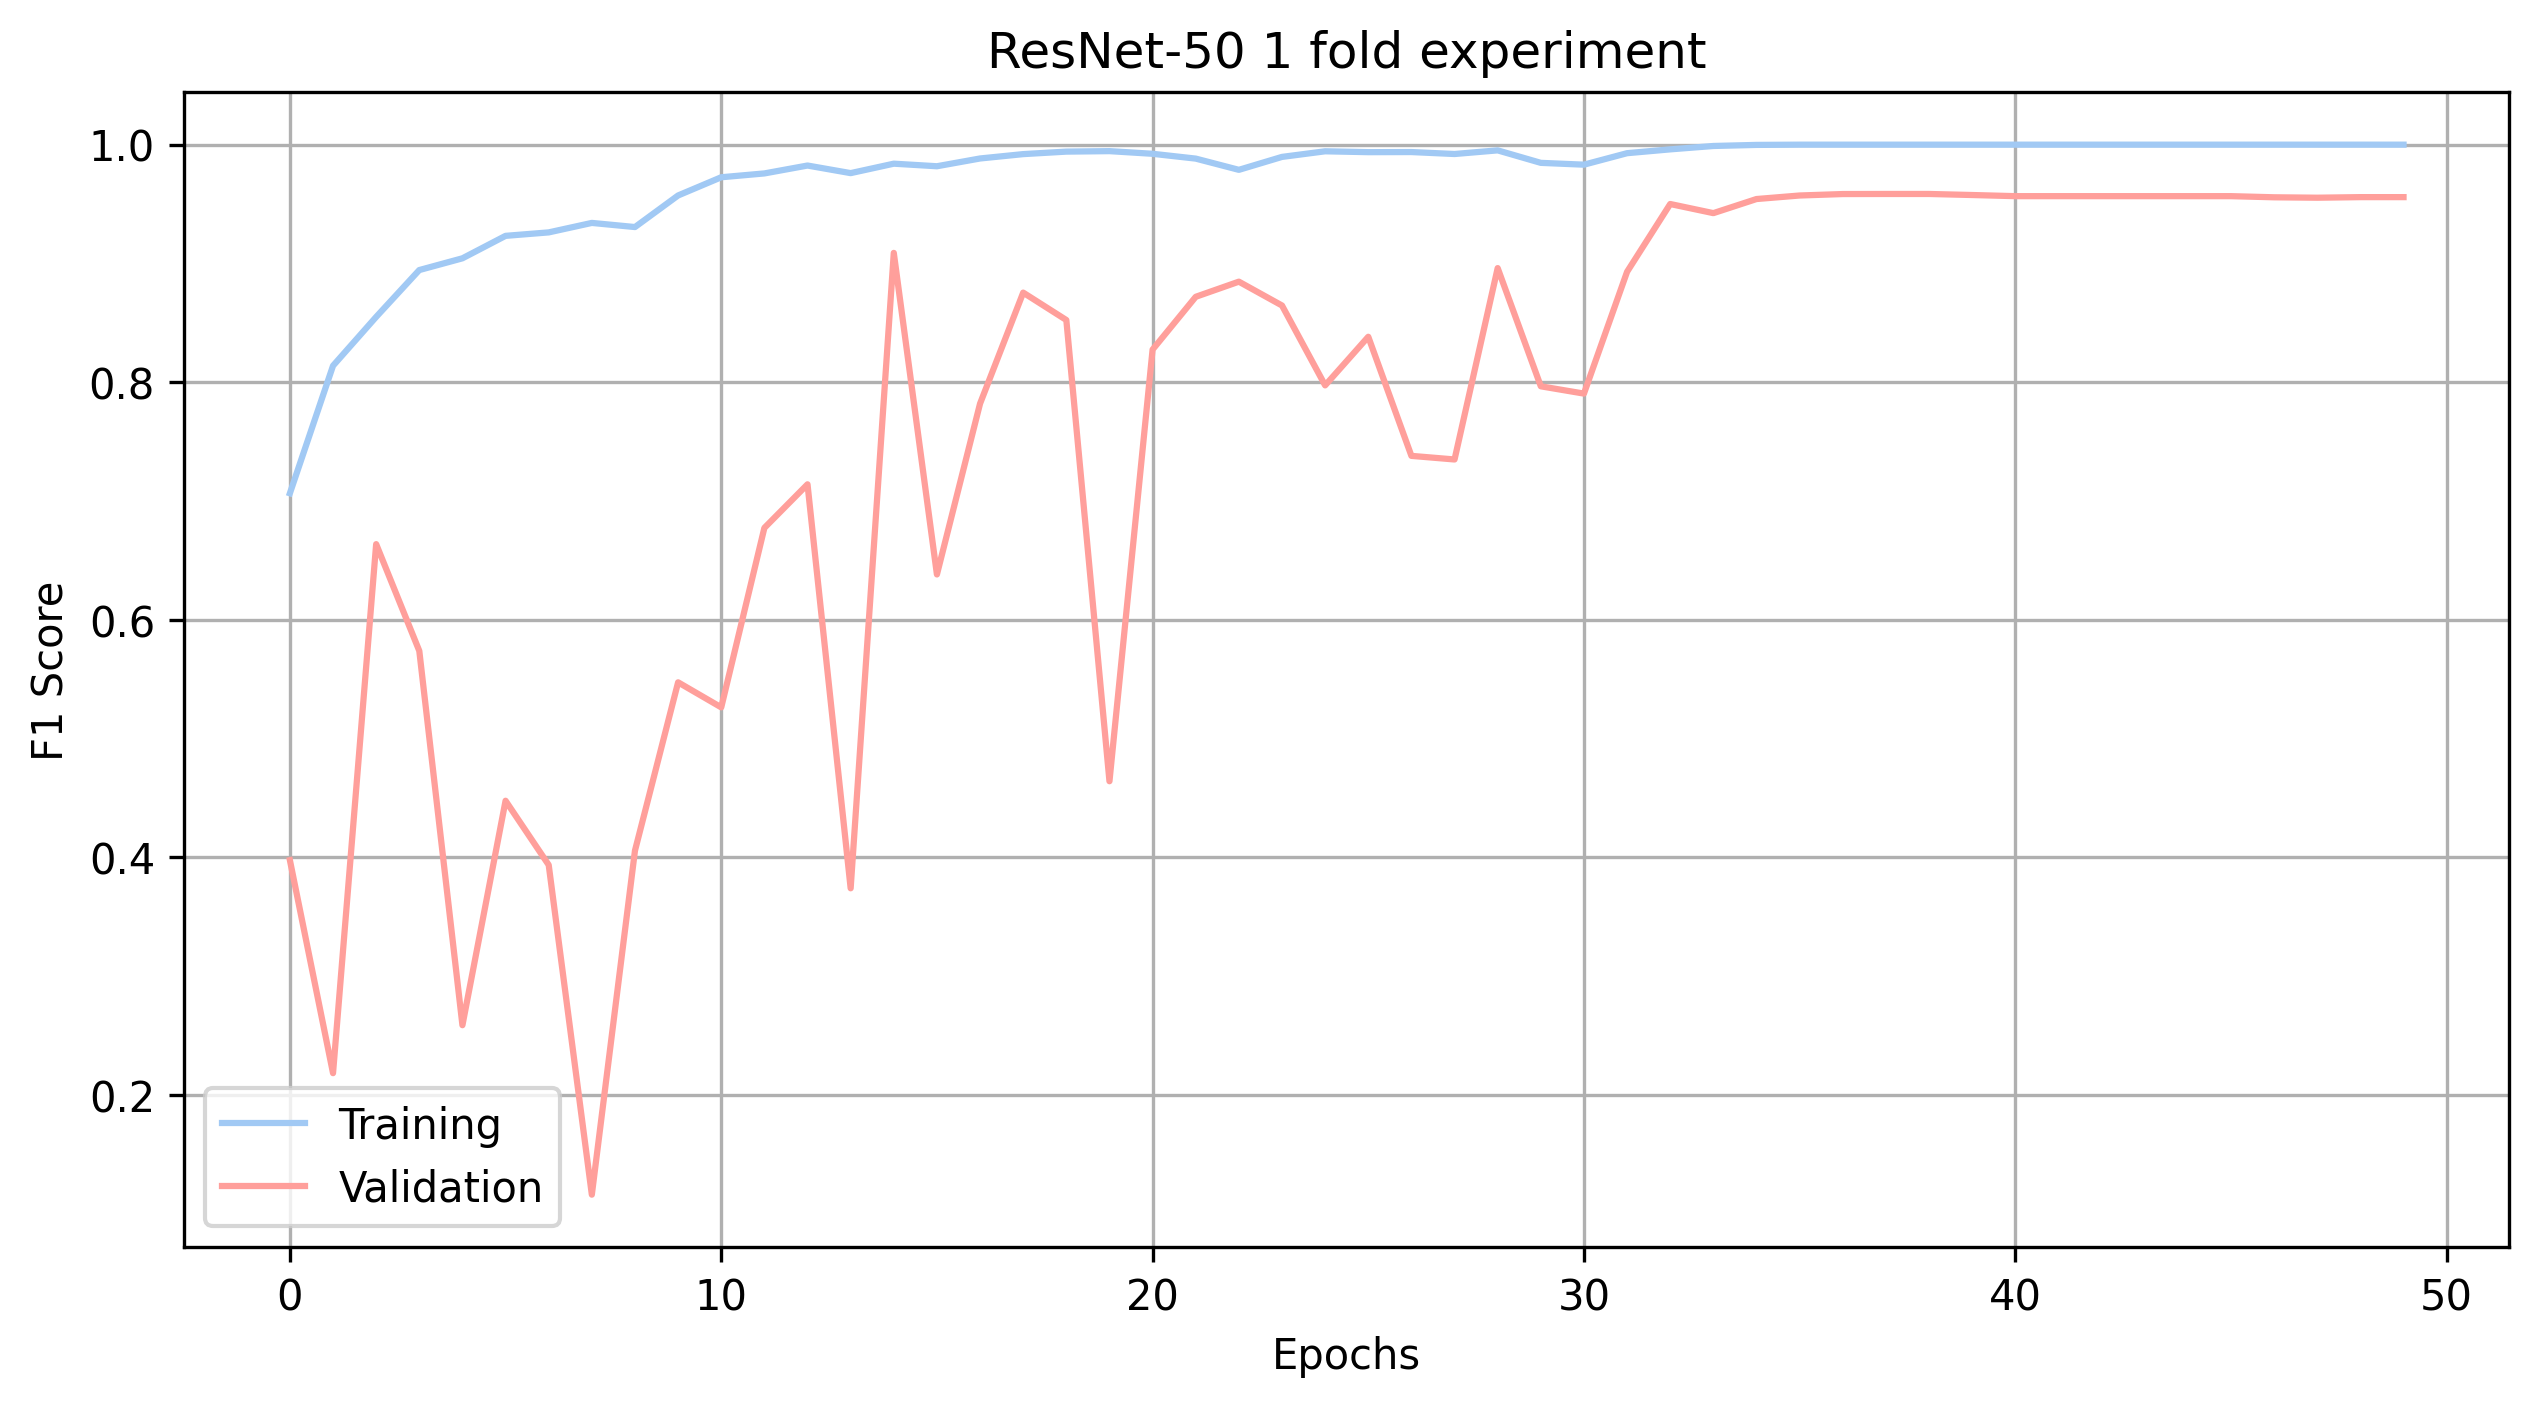

In [68]:
plt.figure(dpi=300, figsize=(10, 5))
sns.lineplot(data=df_r_1f, x="epoch_idx", y="f1_score", color=colors[0], label="Training")
sns.lineplot(data=df_r_1f, x="epoch_idx", y="val_f1_score", color=colors[8], label="Validation")
plt.grid()
plt.title("ResNet-50 1 fold experiment")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.savefig("imgs/resnet_1_fold_experiment_f1_score.png", bbox_inches='tight')

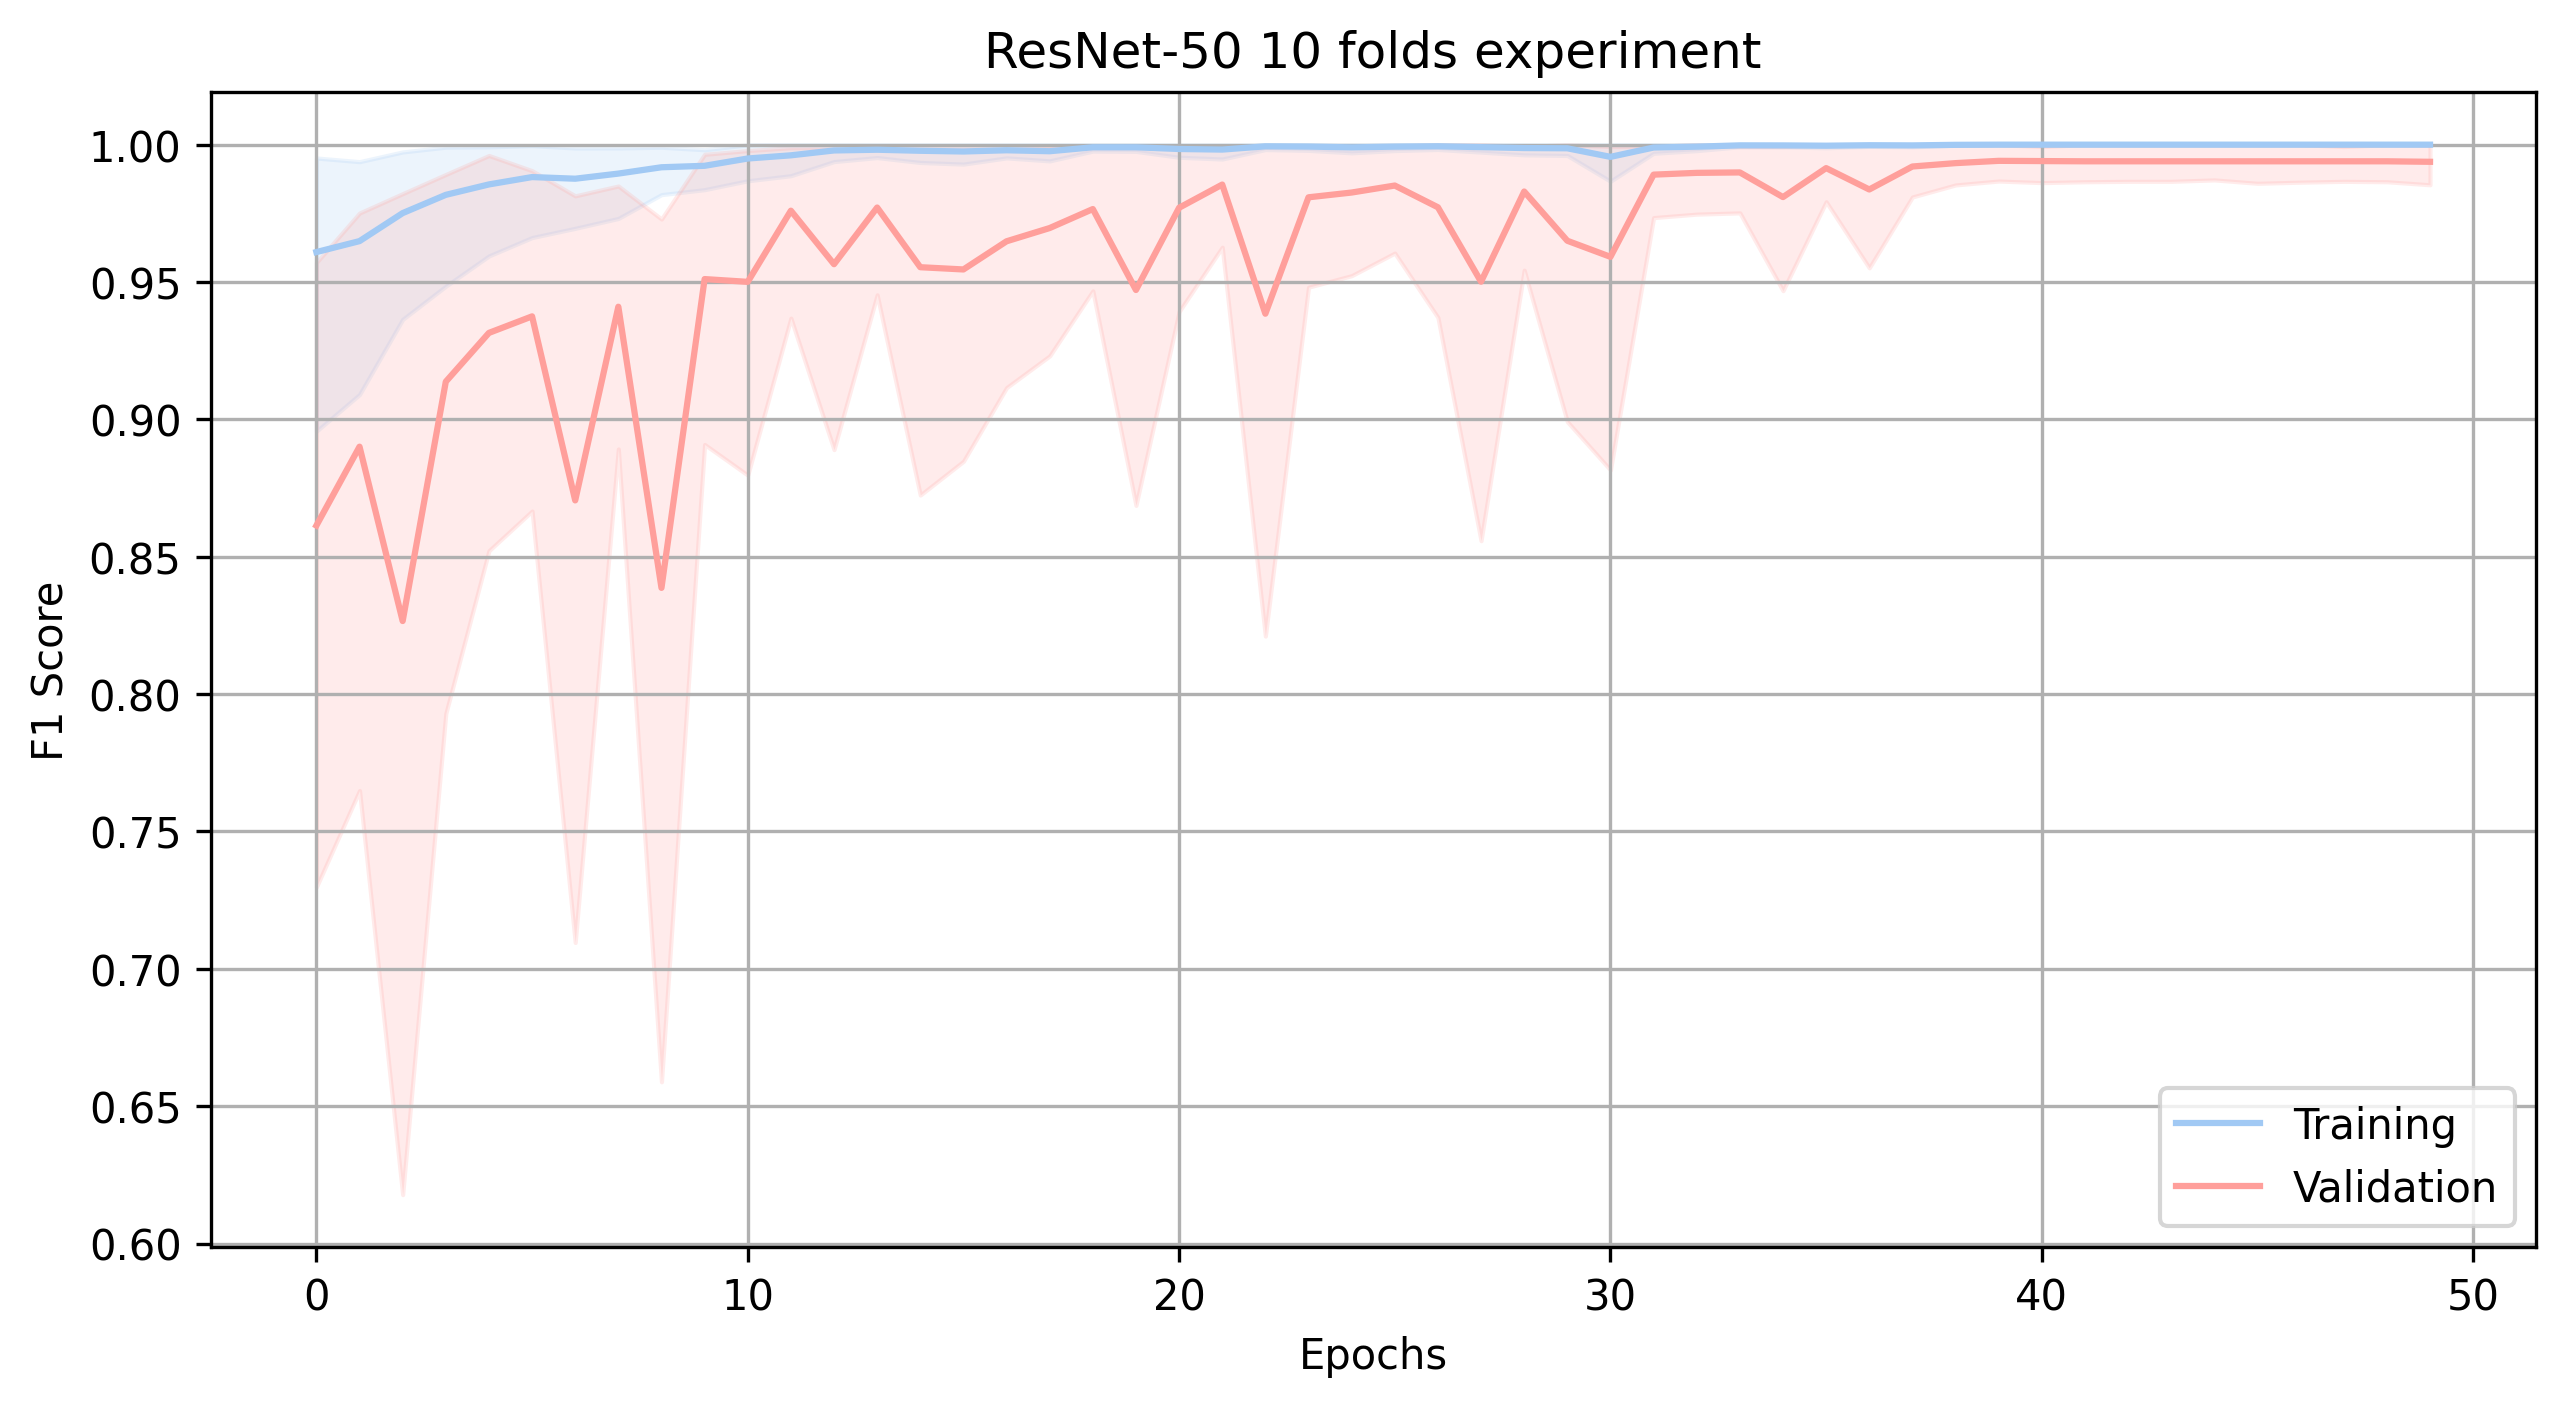

In [69]:
plt.figure(dpi=300, figsize=(10, 5))
sns.lineplot(data=df_r_10f, x="epoch_idx", y="f1_score", color=colors[0], label="Training")
sns.lineplot(data=df_r_10f, x="epoch_idx", y="val_f1_score", color=colors[8], label="Validation")
plt.grid()
plt.title("ResNet-50 10 folds experiment")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.savefig("imgs/resnet_10_folds_experiment_f1_score.png", bbox_inches='tight')

# Loss

## ARM-Net

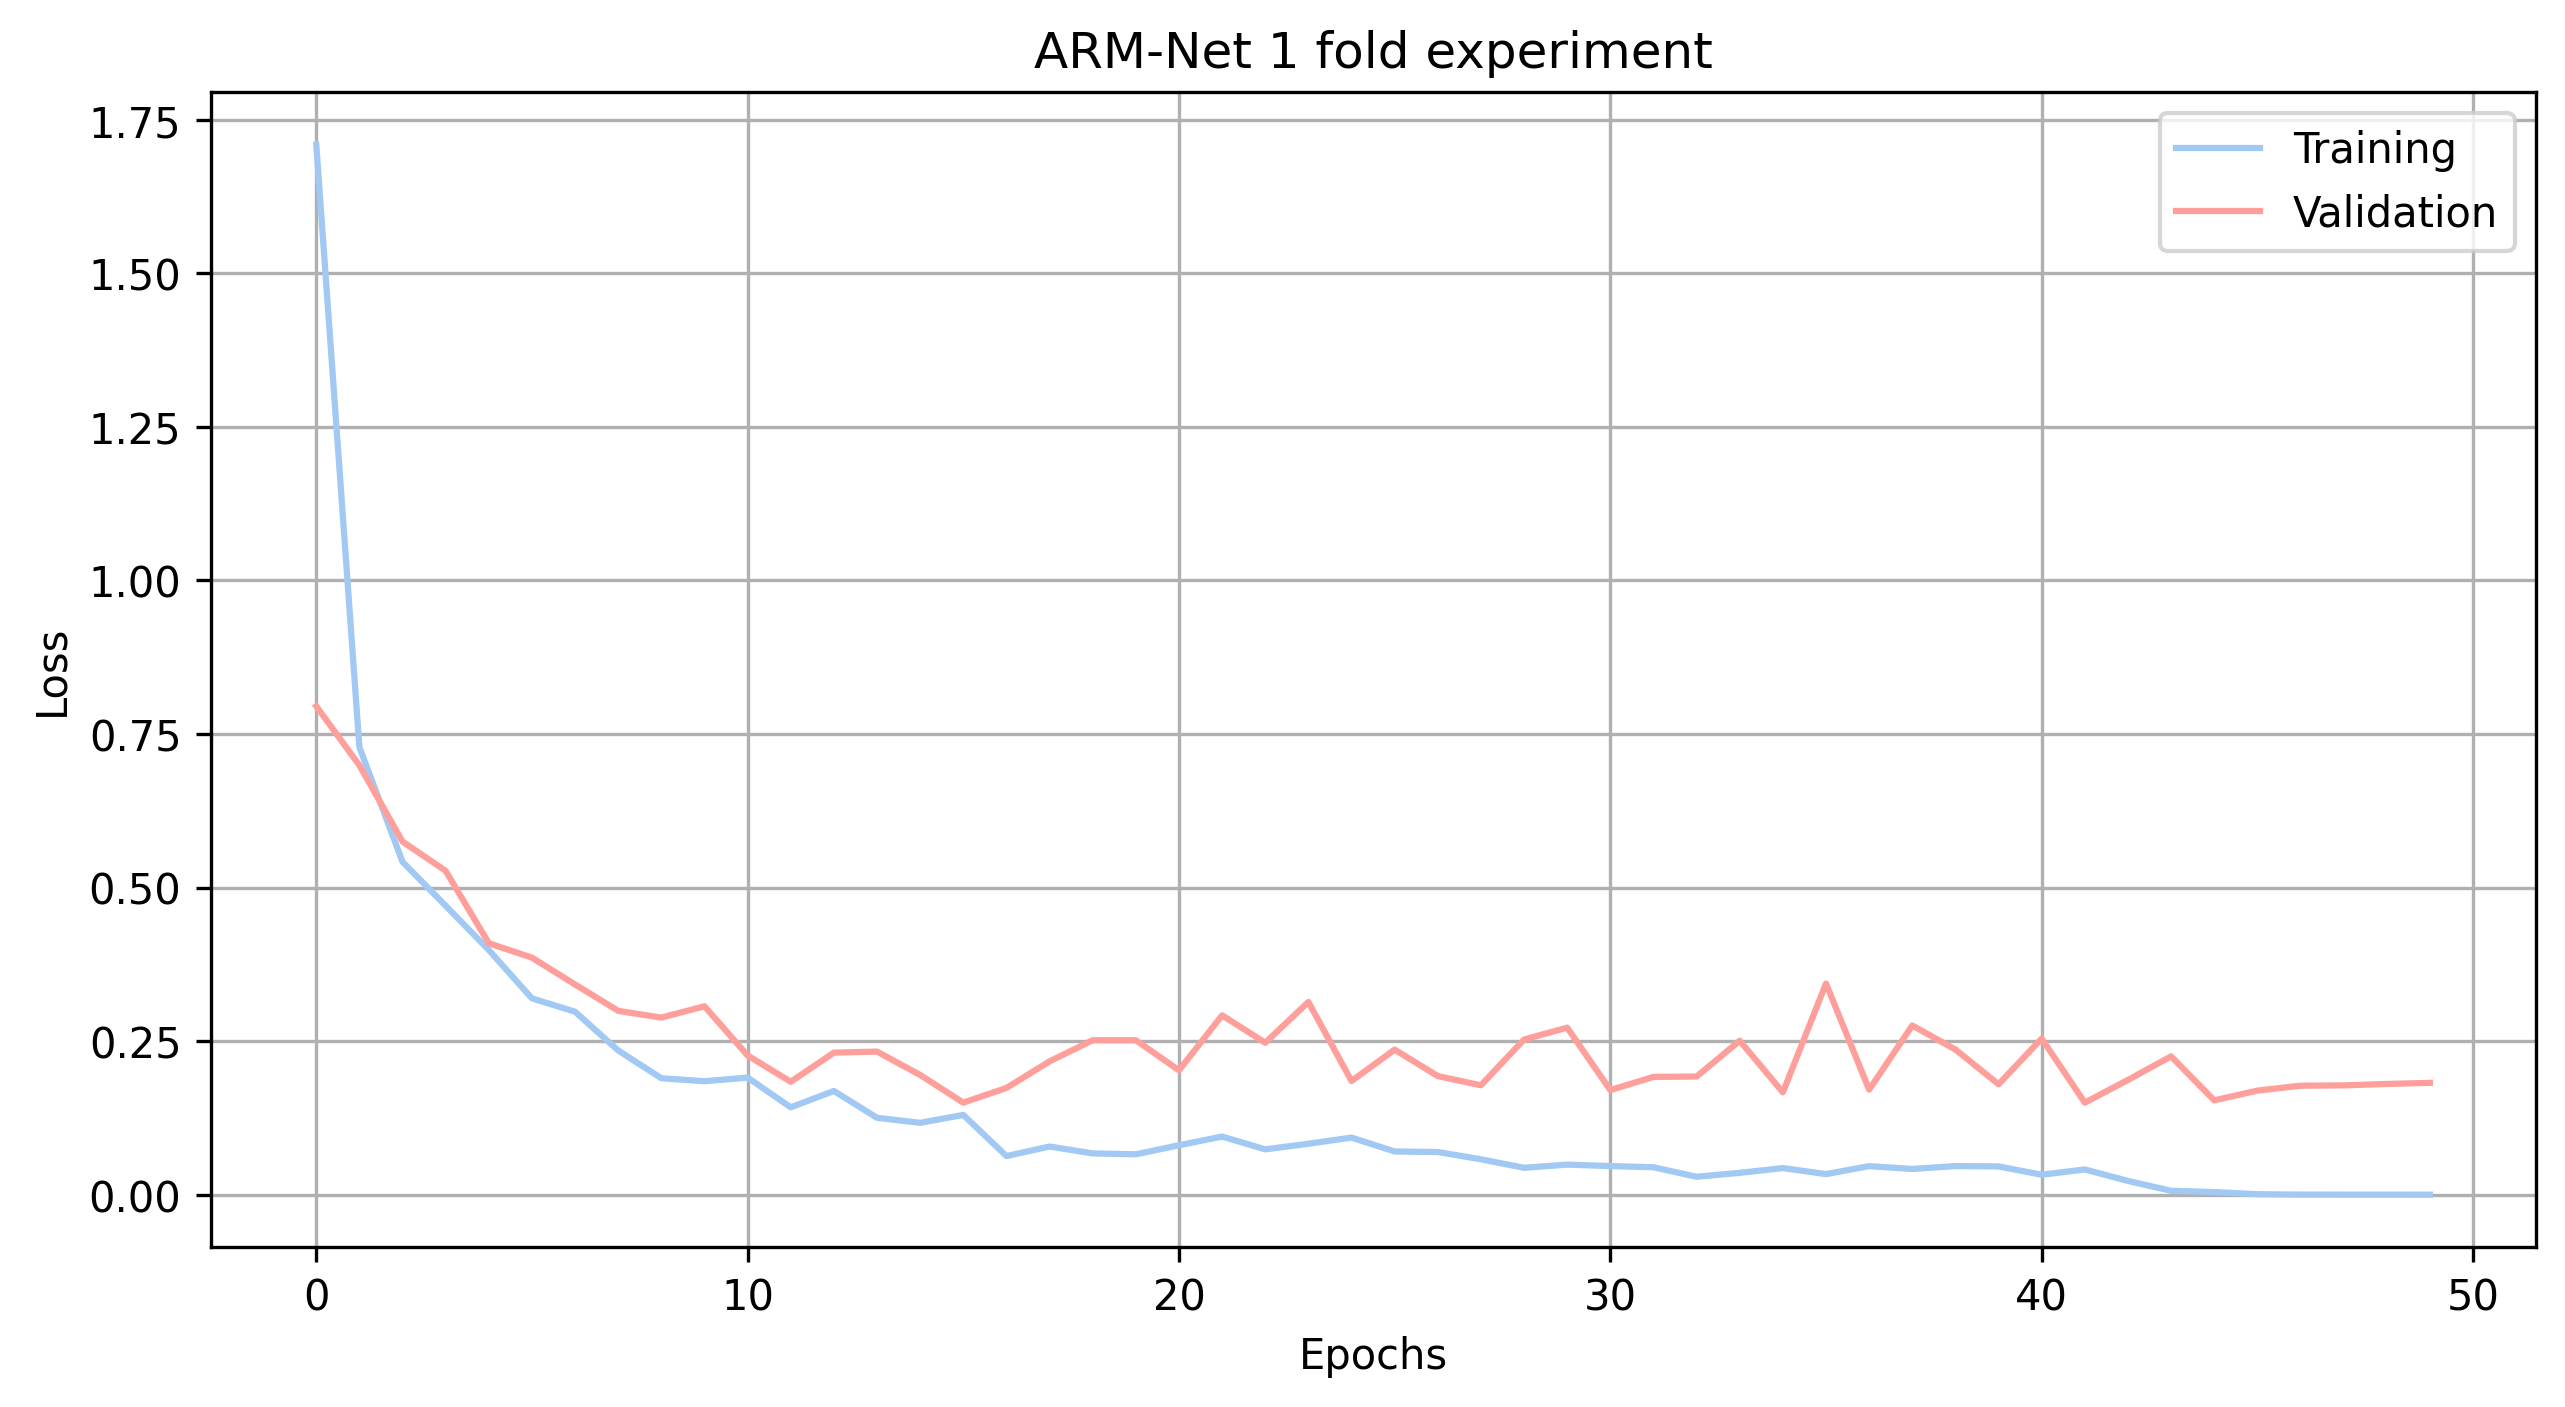

In [76]:
plt.figure(dpi=300, figsize=(10, 5))
sns.lineplot(data=df_a_1f, x="epoch_idx", y="loss", color=colors[0], label="Training")
sns.lineplot(data=df_a_1f, x="epoch_idx", y="val_loss", color=colors[8], label="Validation")
plt.grid()
plt.title("ARM-Net 1 fold experiment")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("imgs/armnet_1_fold_experiment_loss.png", bbox_inches='tight')

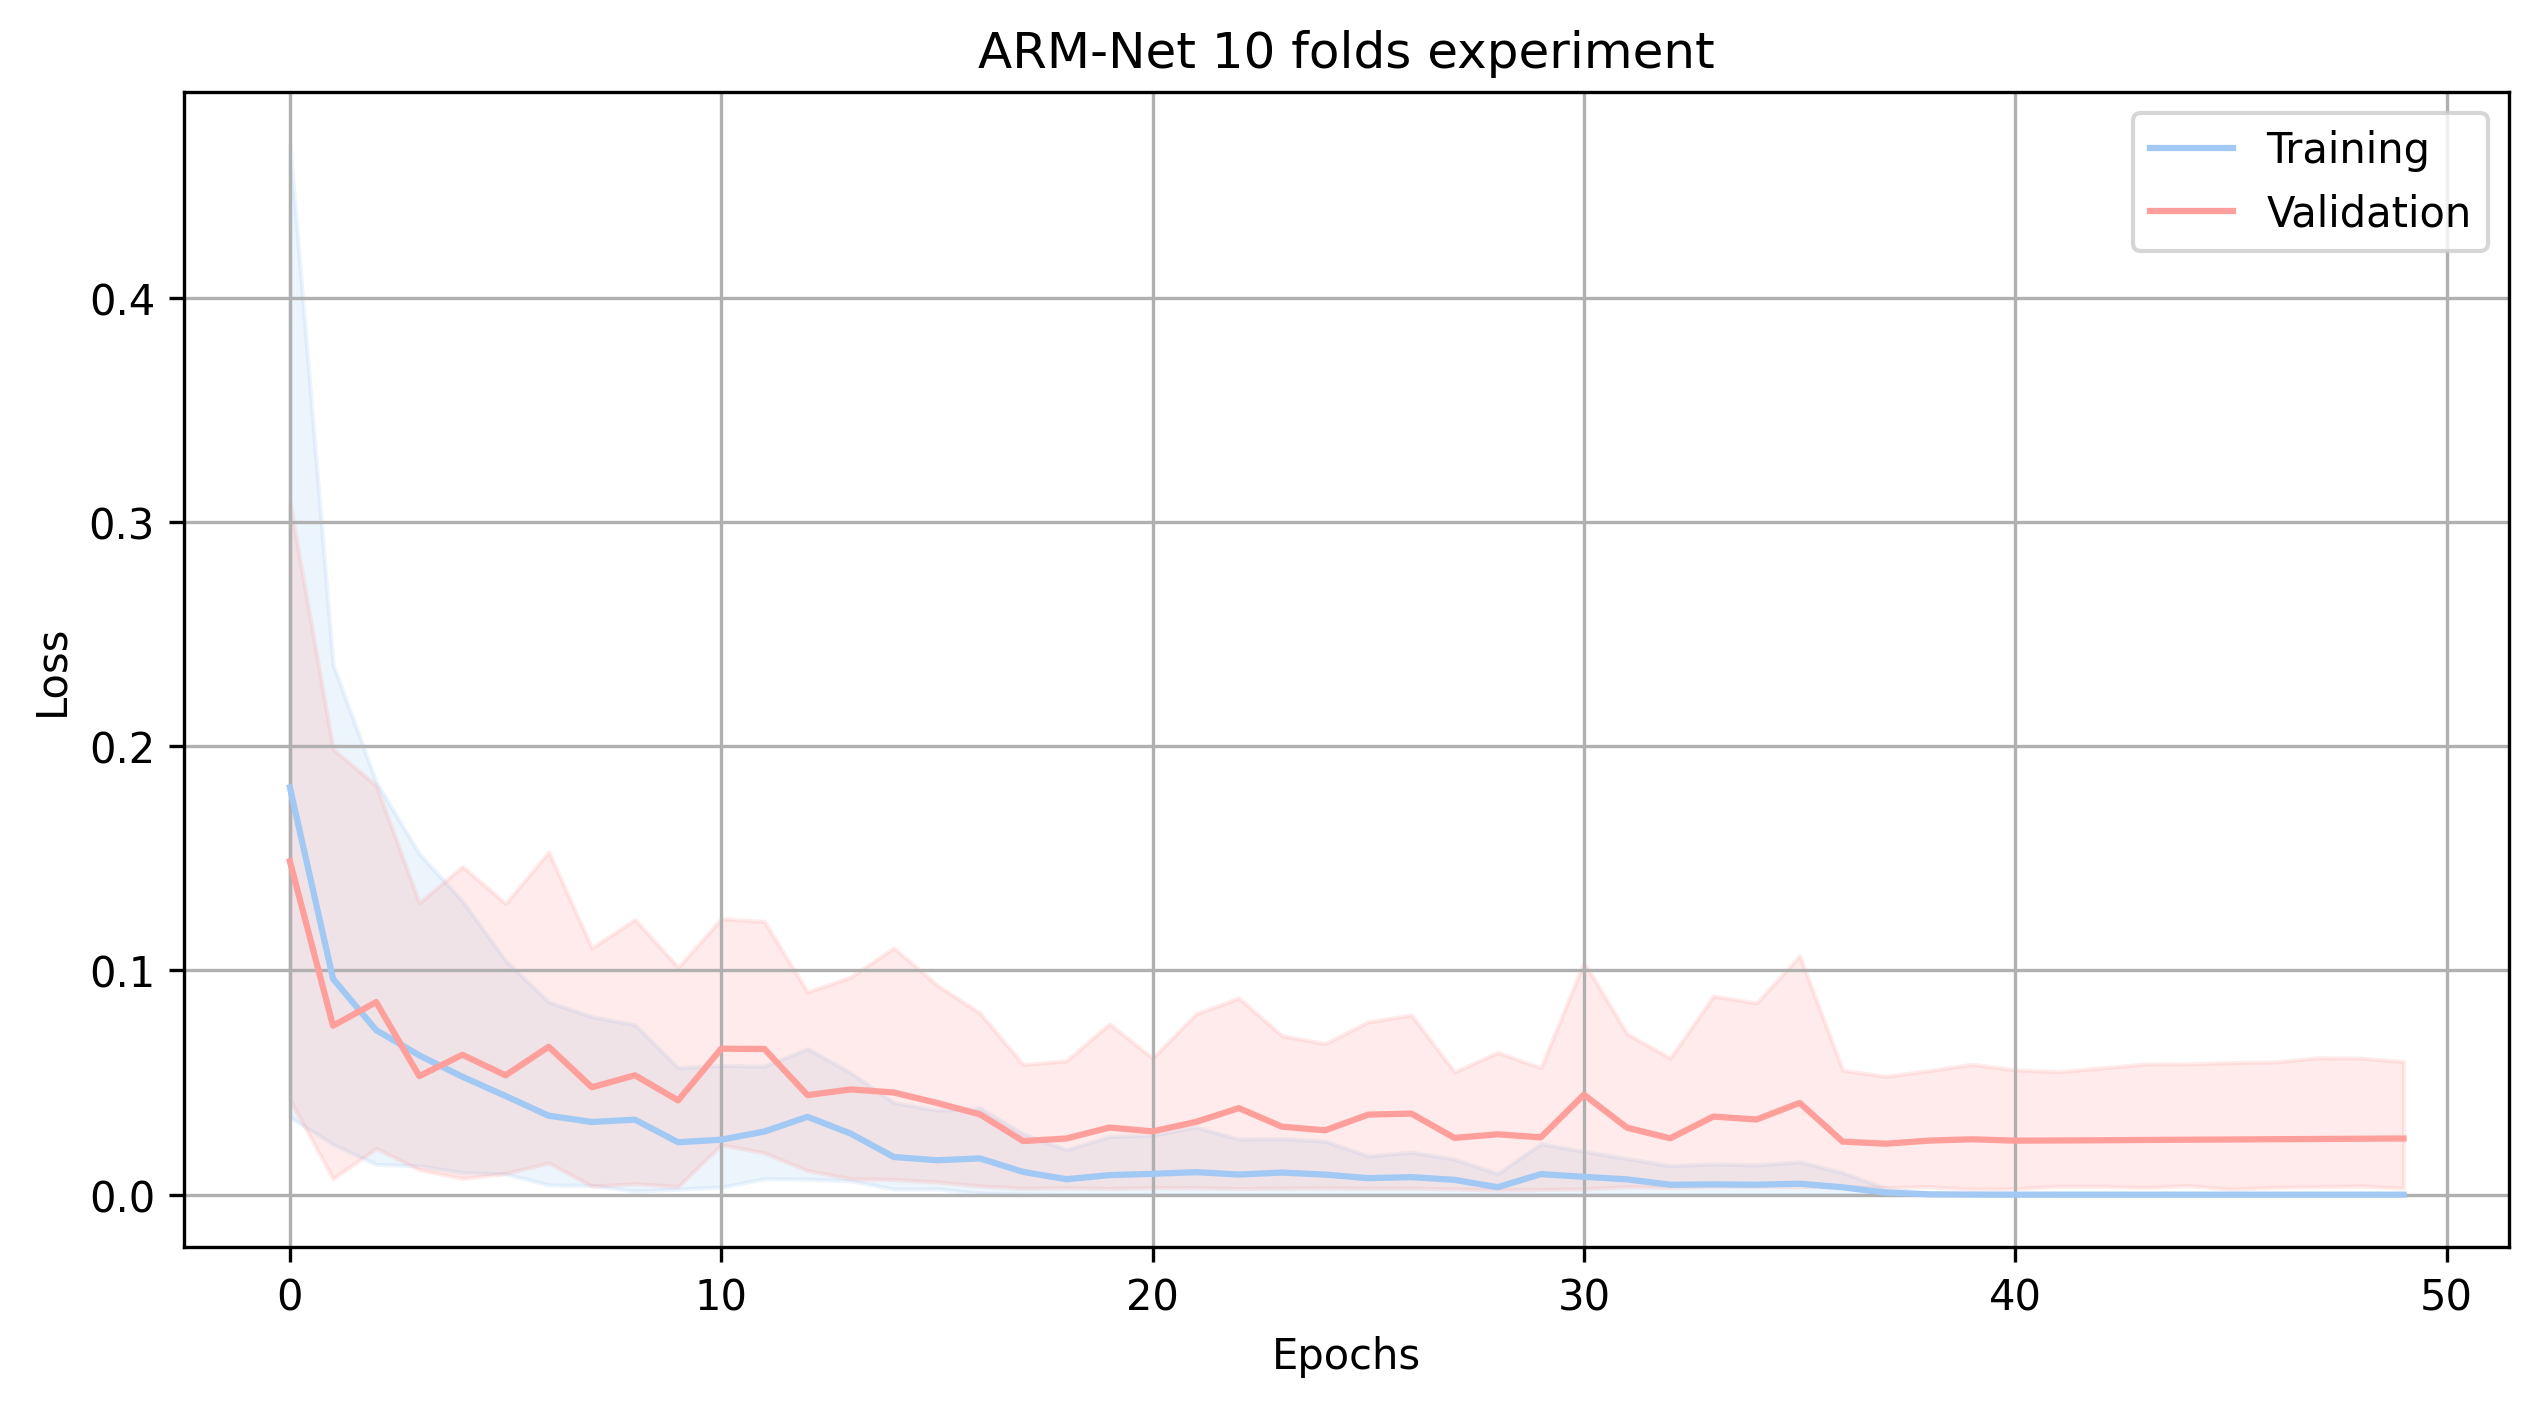

In [77]:
plt.figure(dpi=300, figsize=(10, 5))
sns.lineplot(data=df_a_10f, x="epoch_idx", y="loss", color=colors[0], label="Training")
sns.lineplot(data=df_a_10f, x="epoch_idx", y="val_loss", color=colors[8], label="Validation")
plt.grid()
plt.title("ARM-Net 10 folds experiment")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("imgs/armnet_10_folds_experiment_loss.png", bbox_inches='tight')

## ResNet-50

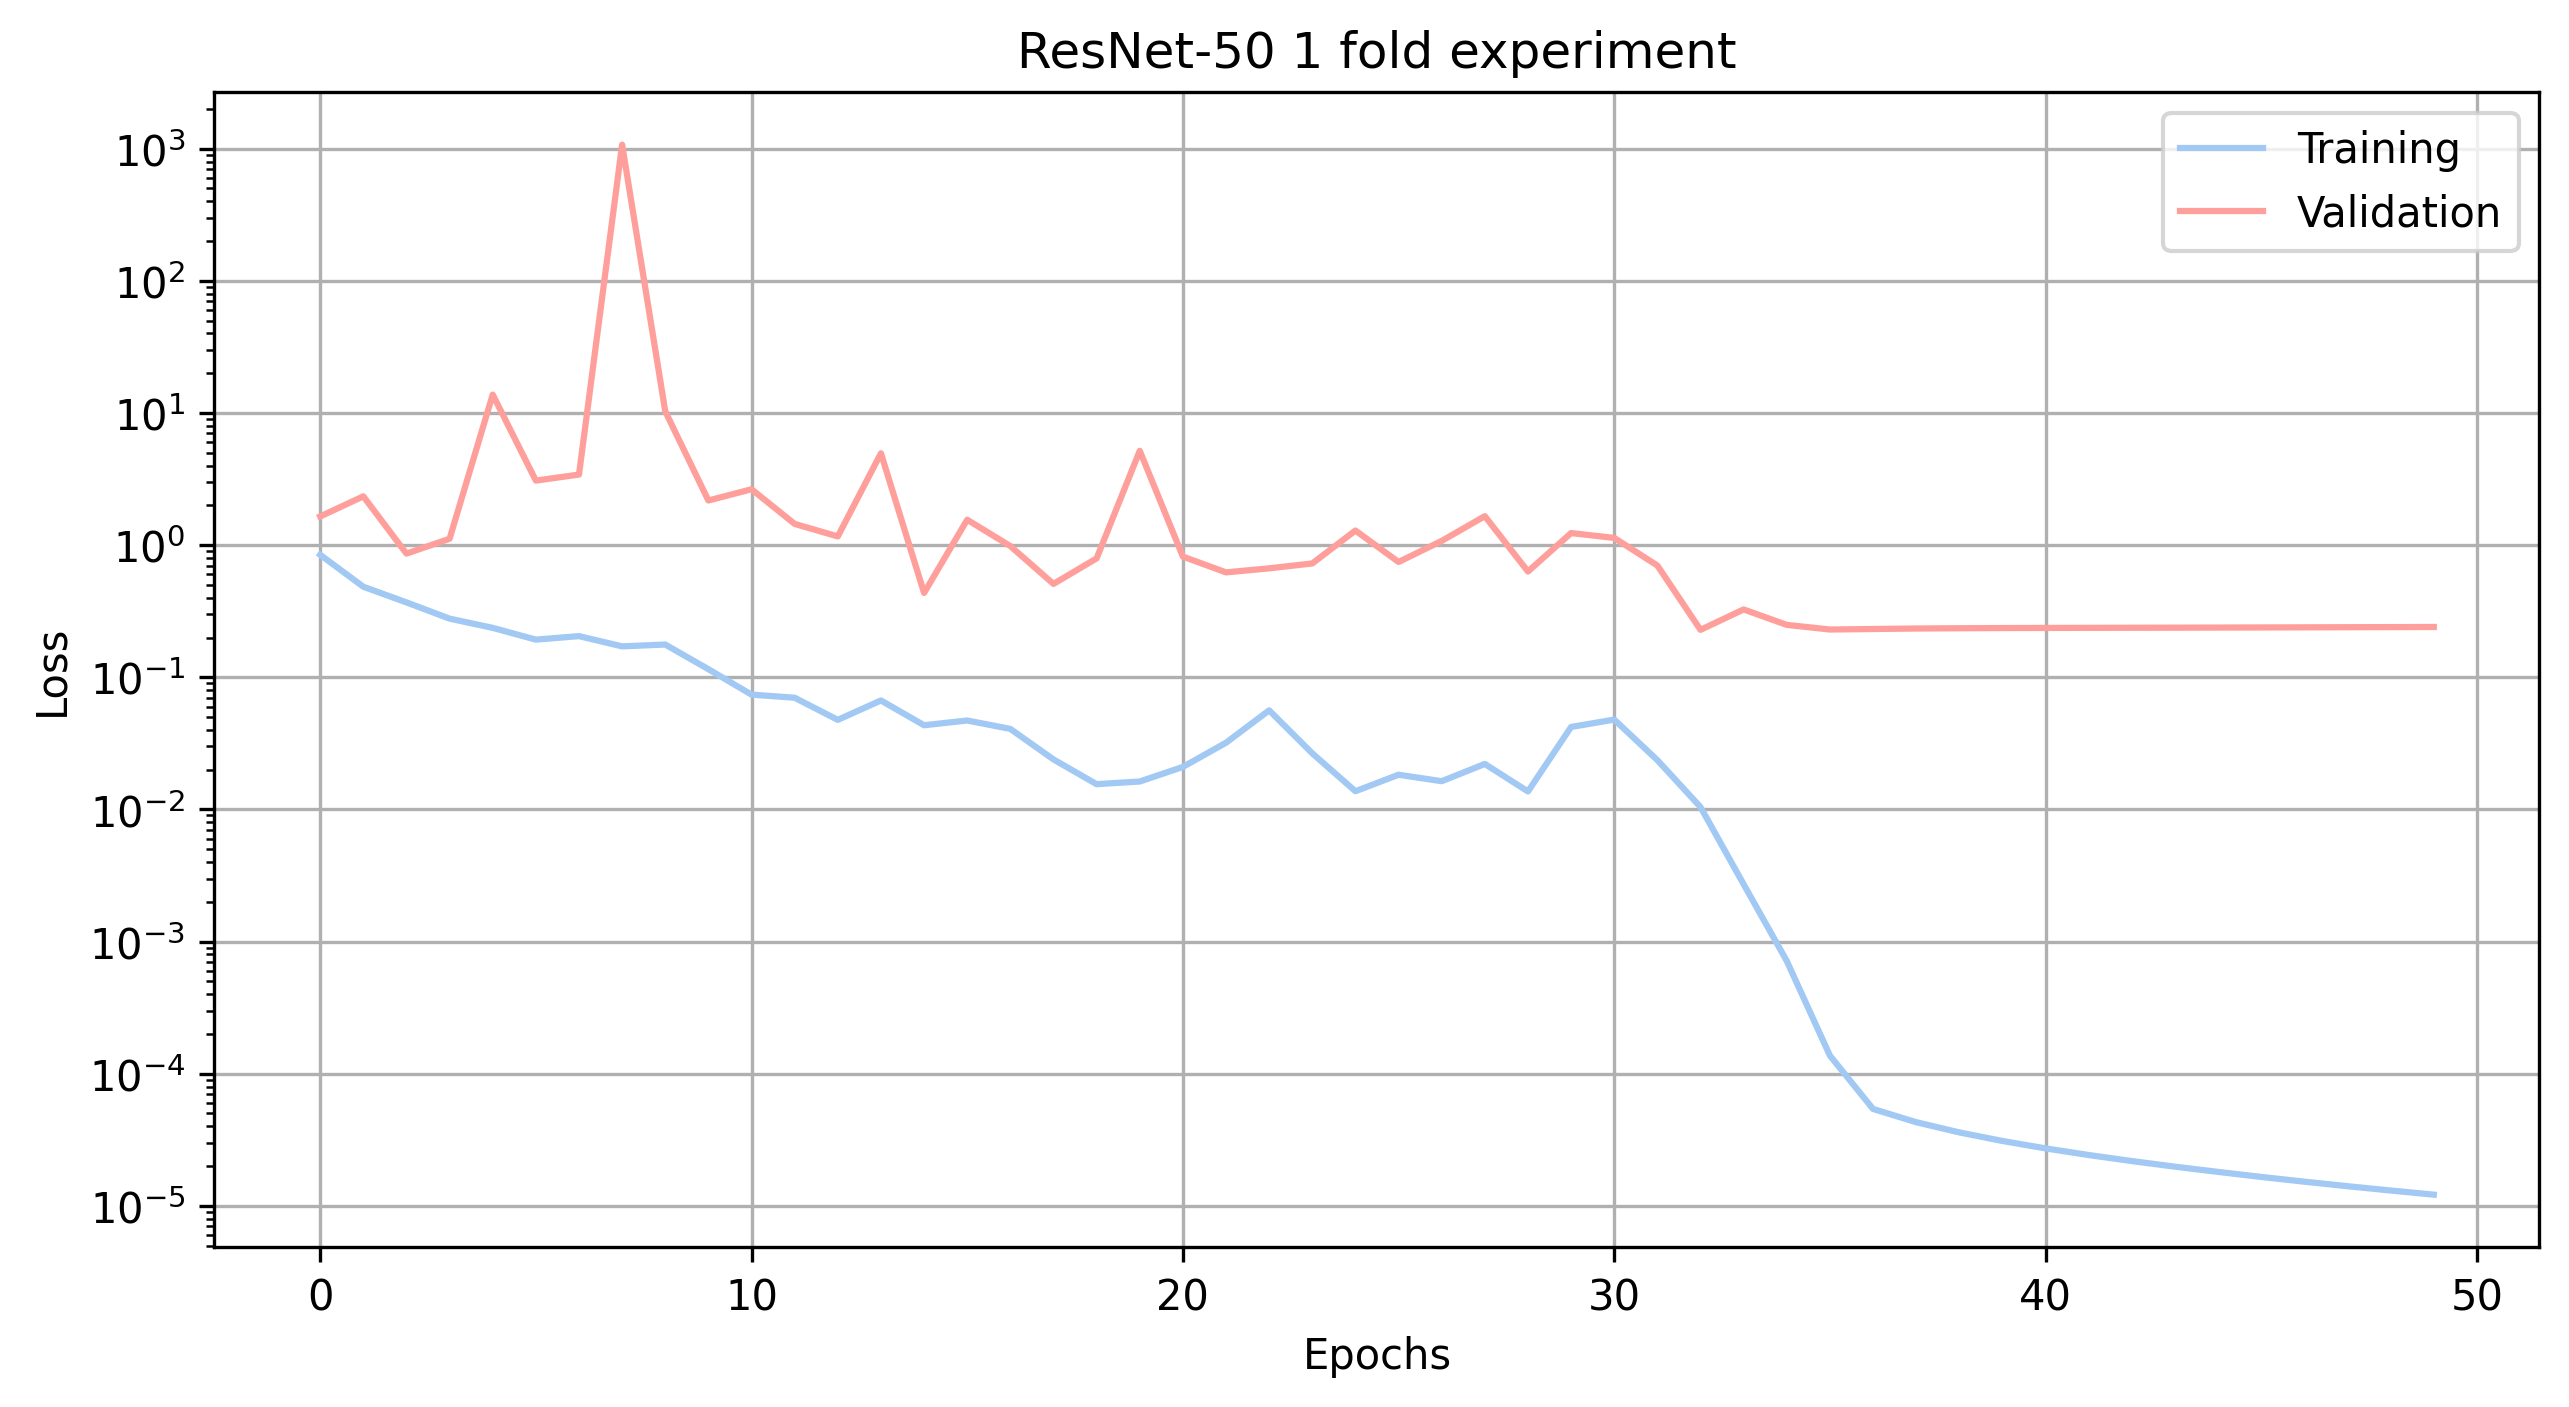

In [78]:
plt.figure(dpi=300, figsize=(10, 5))
sns.lineplot(data=df_r_1f, x="epoch_idx", y="loss", color=colors[0], label="Training")
sns.lineplot(data=df_r_1f, x="epoch_idx", y="val_loss", color=colors[8], label="Validation")
plt.grid()
plt.title("ResNet-50 1 fold experiment")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log')
# plt.ylim([0, 1])
# plt.savefig("imgs/resnet_1_fold_experiment_loss.png")
plt.savefig("imgs/resnet_1_fold_experiment_loss.png", bbox_inches='tight')

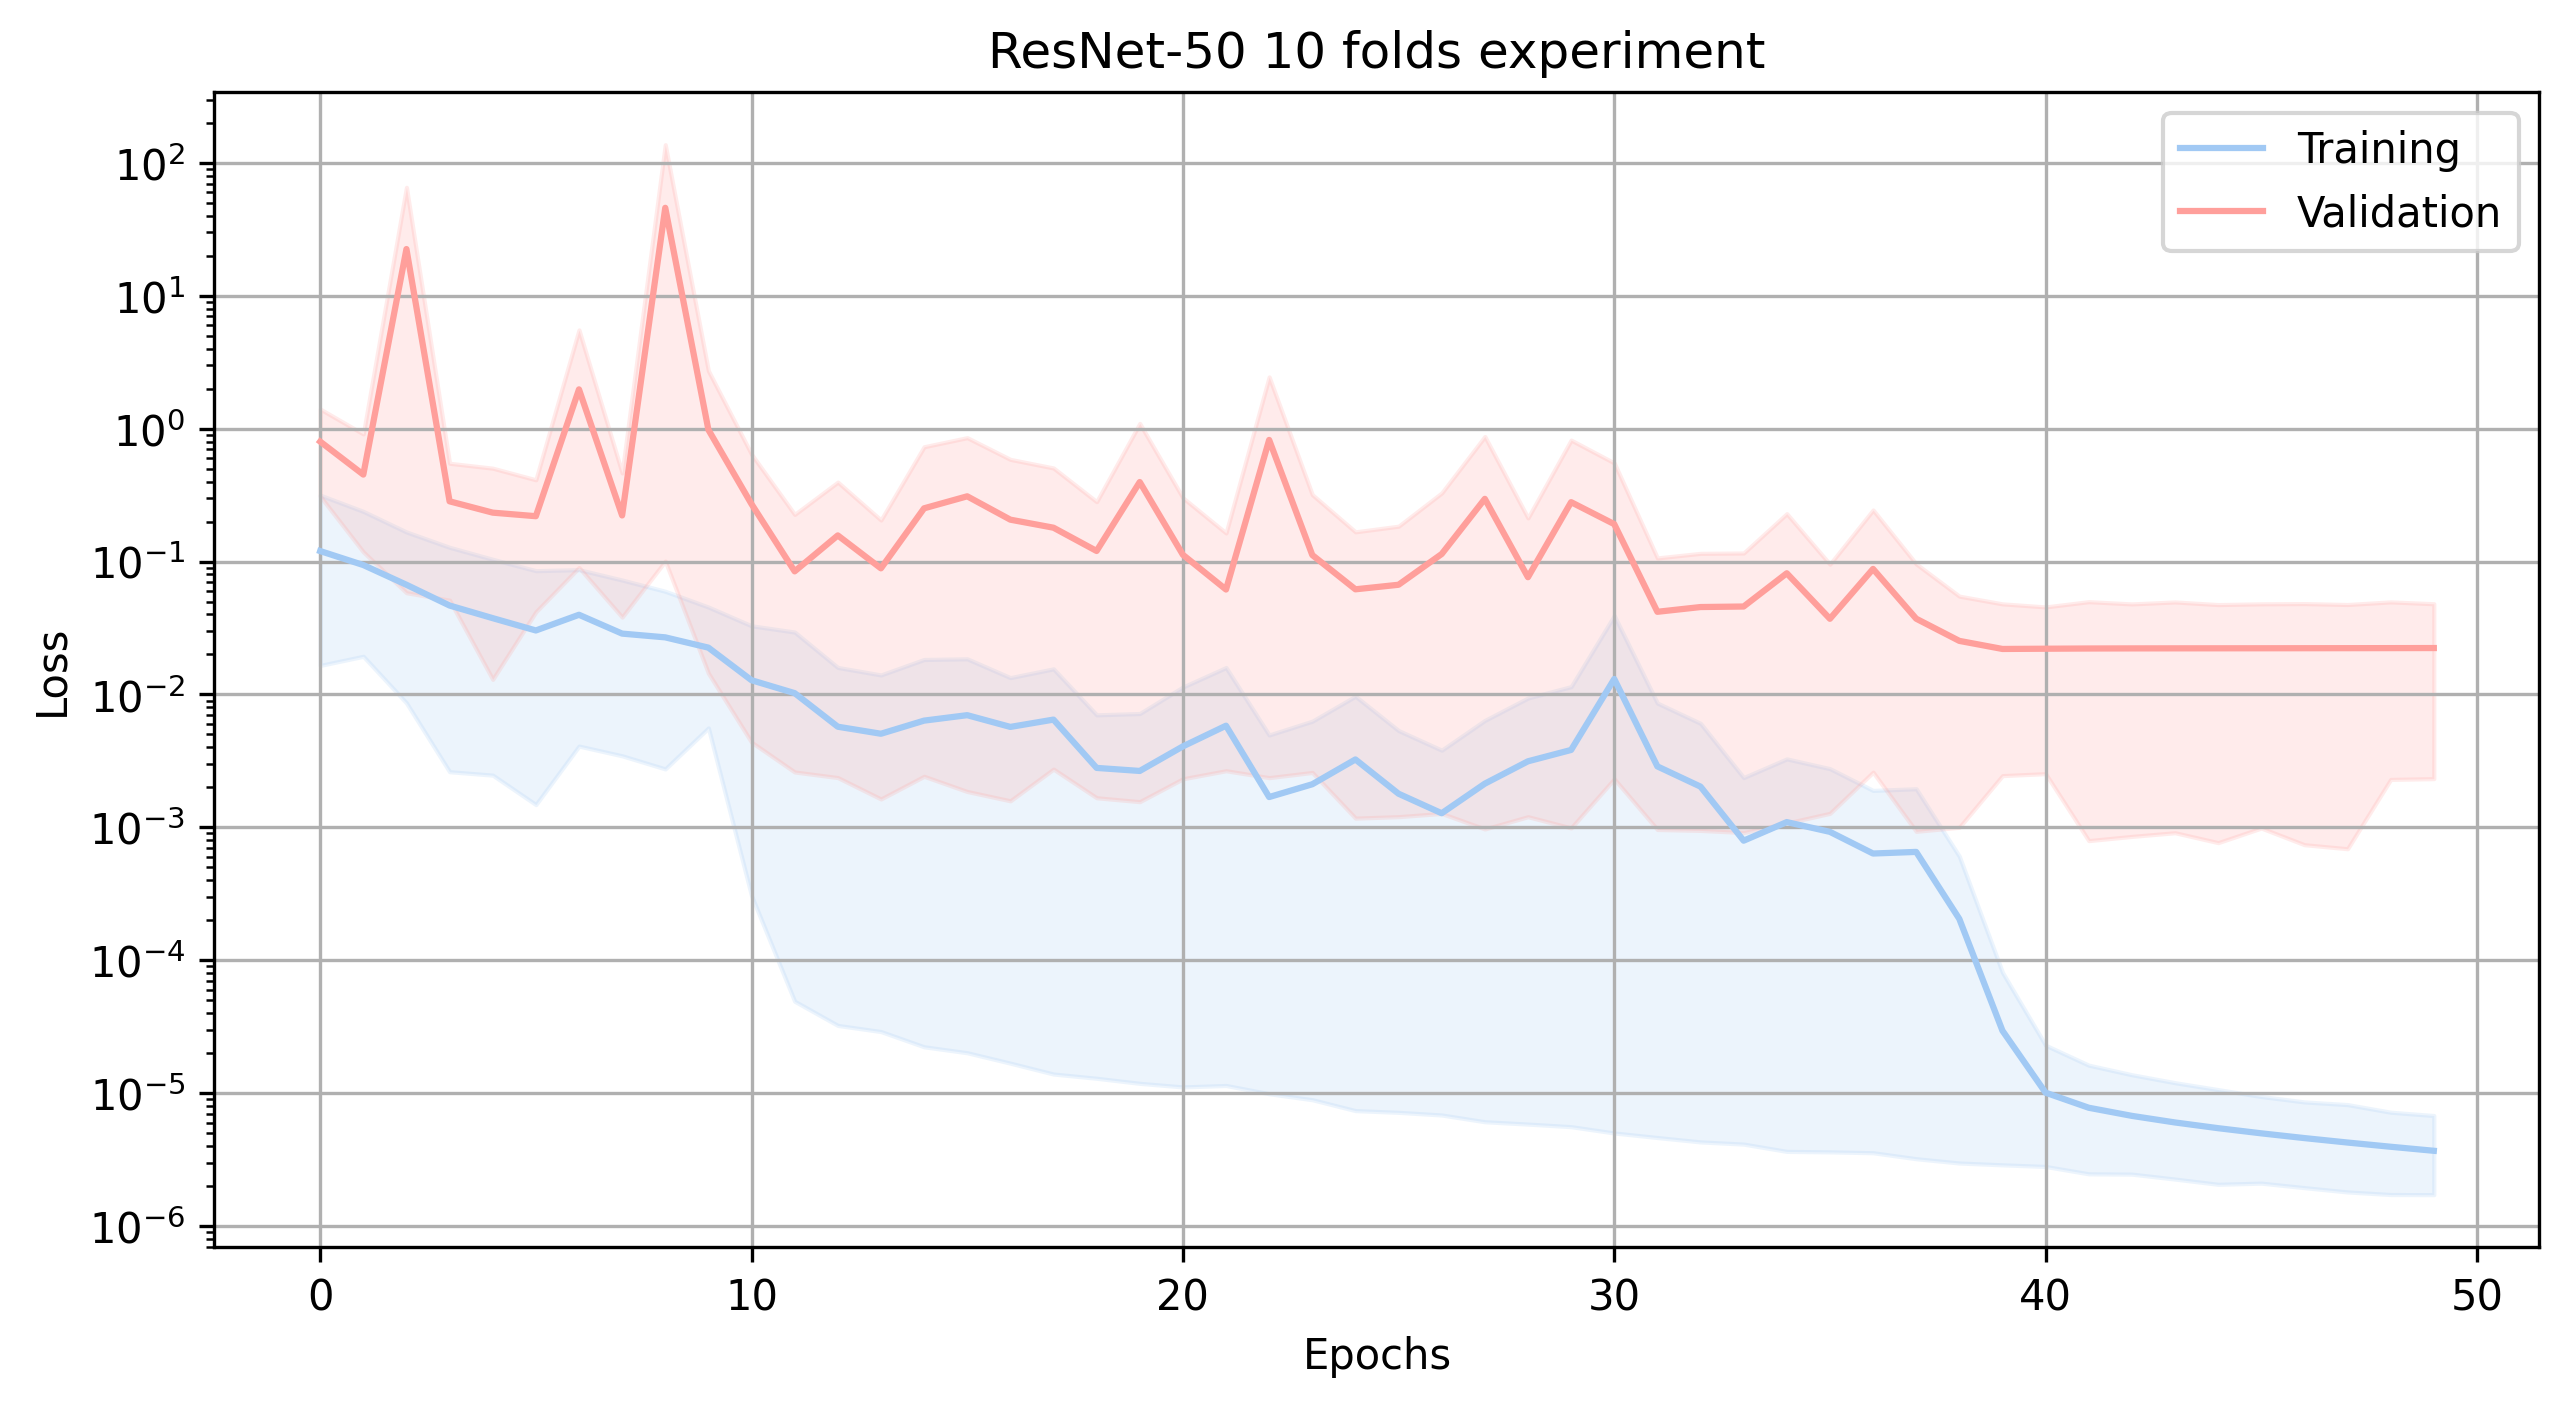

In [79]:
plt.figure(dpi=300, figsize=(10, 5))
sns.lineplot(data=df_r_10f, x="epoch_idx", y="loss", color=colors[0], label="Training")
sns.lineplot(data=df_r_10f, x="epoch_idx", y="val_loss", color=colors[8], label="Validation")
plt.grid()
plt.title("ResNet-50 10 folds experiment")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log')
# plt.ylim([0, 1])
plt.savefig("imgs/resnet_10_folds_experiment_loss.png", bbox_inches='tight')

# Performance


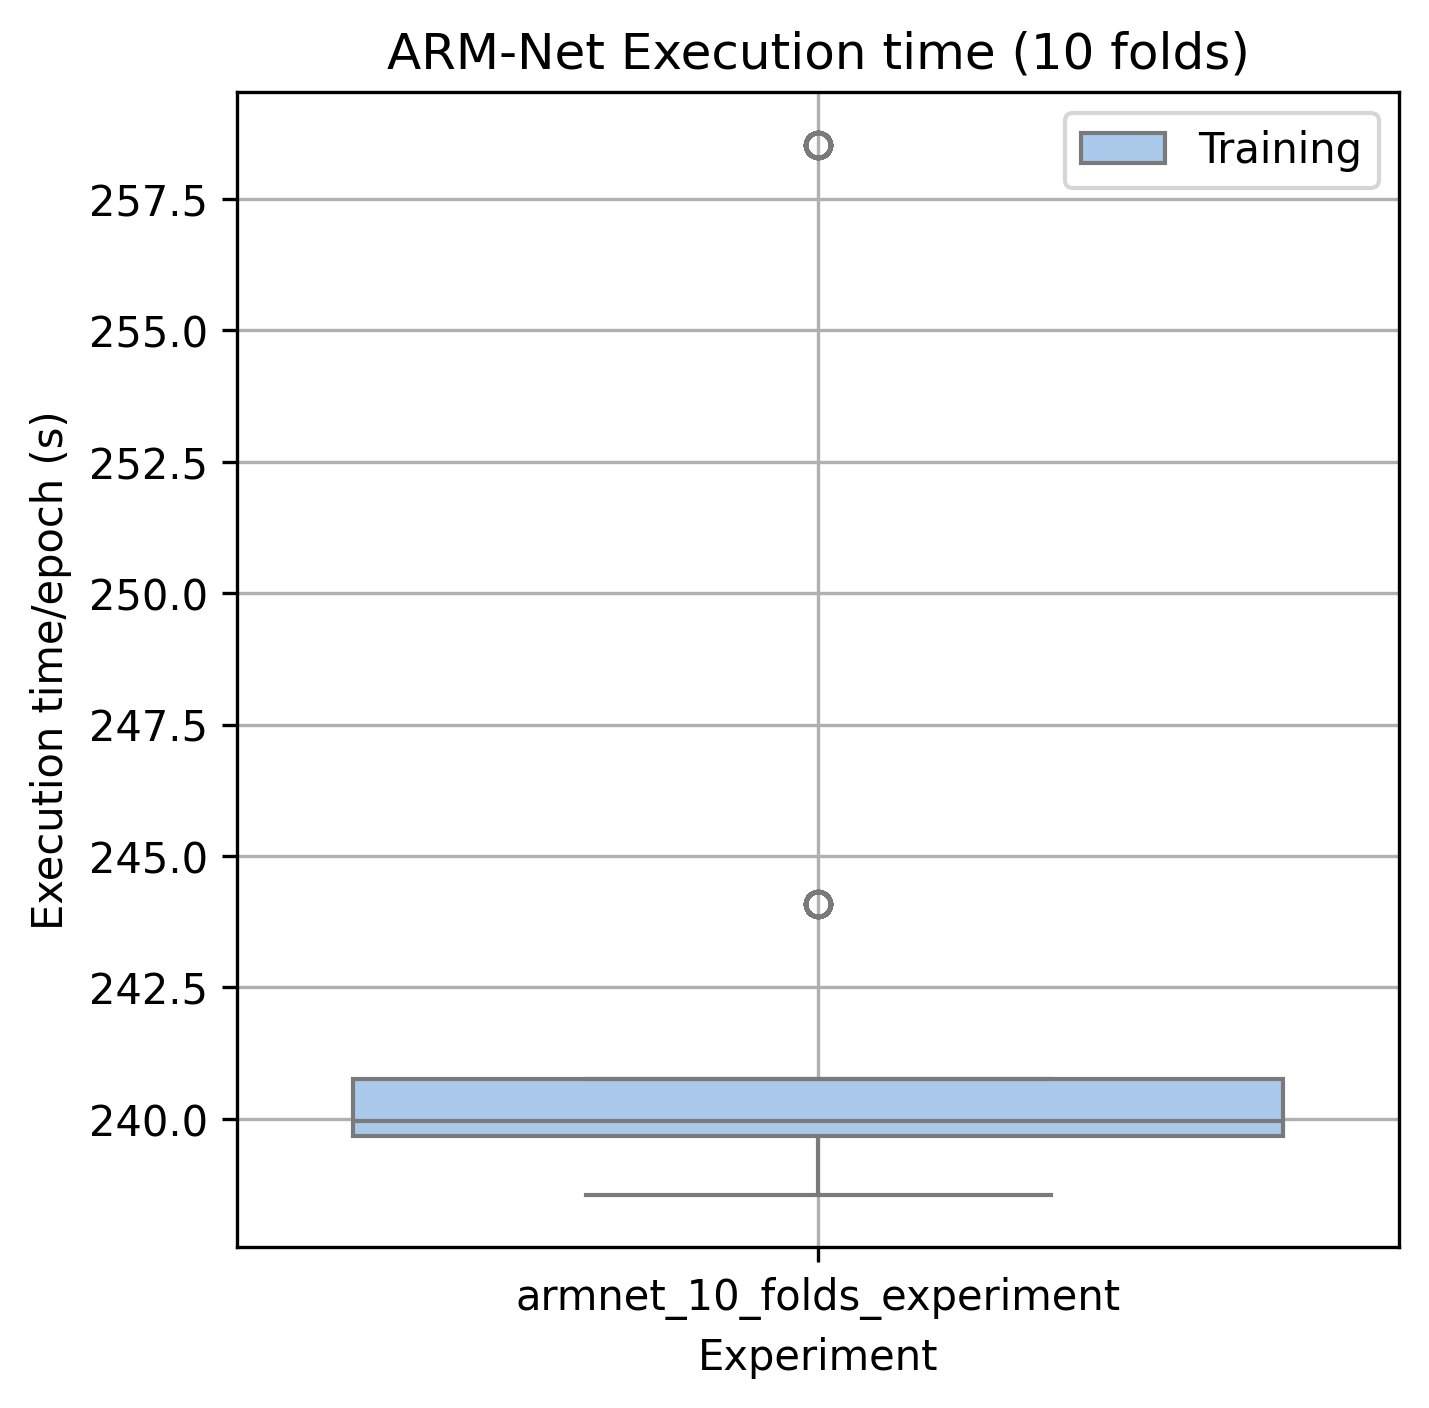

In [84]:
plt.figure(dpi=300, figsize=(5, 5))
sns.boxplot(data=df_a_10f, x="experiment_name", y="duration", color=colors[0], label="Training")
plt.grid()
plt.title("ARM-Net Execution time (10 folds)")
plt.xlabel("Experiment")
plt.ylabel("Execution time/epoch (s)")
plt.savefig("imgs/armnet_10_folds_exec_time_box.png", bbox_inches='tight')
# plt.close()

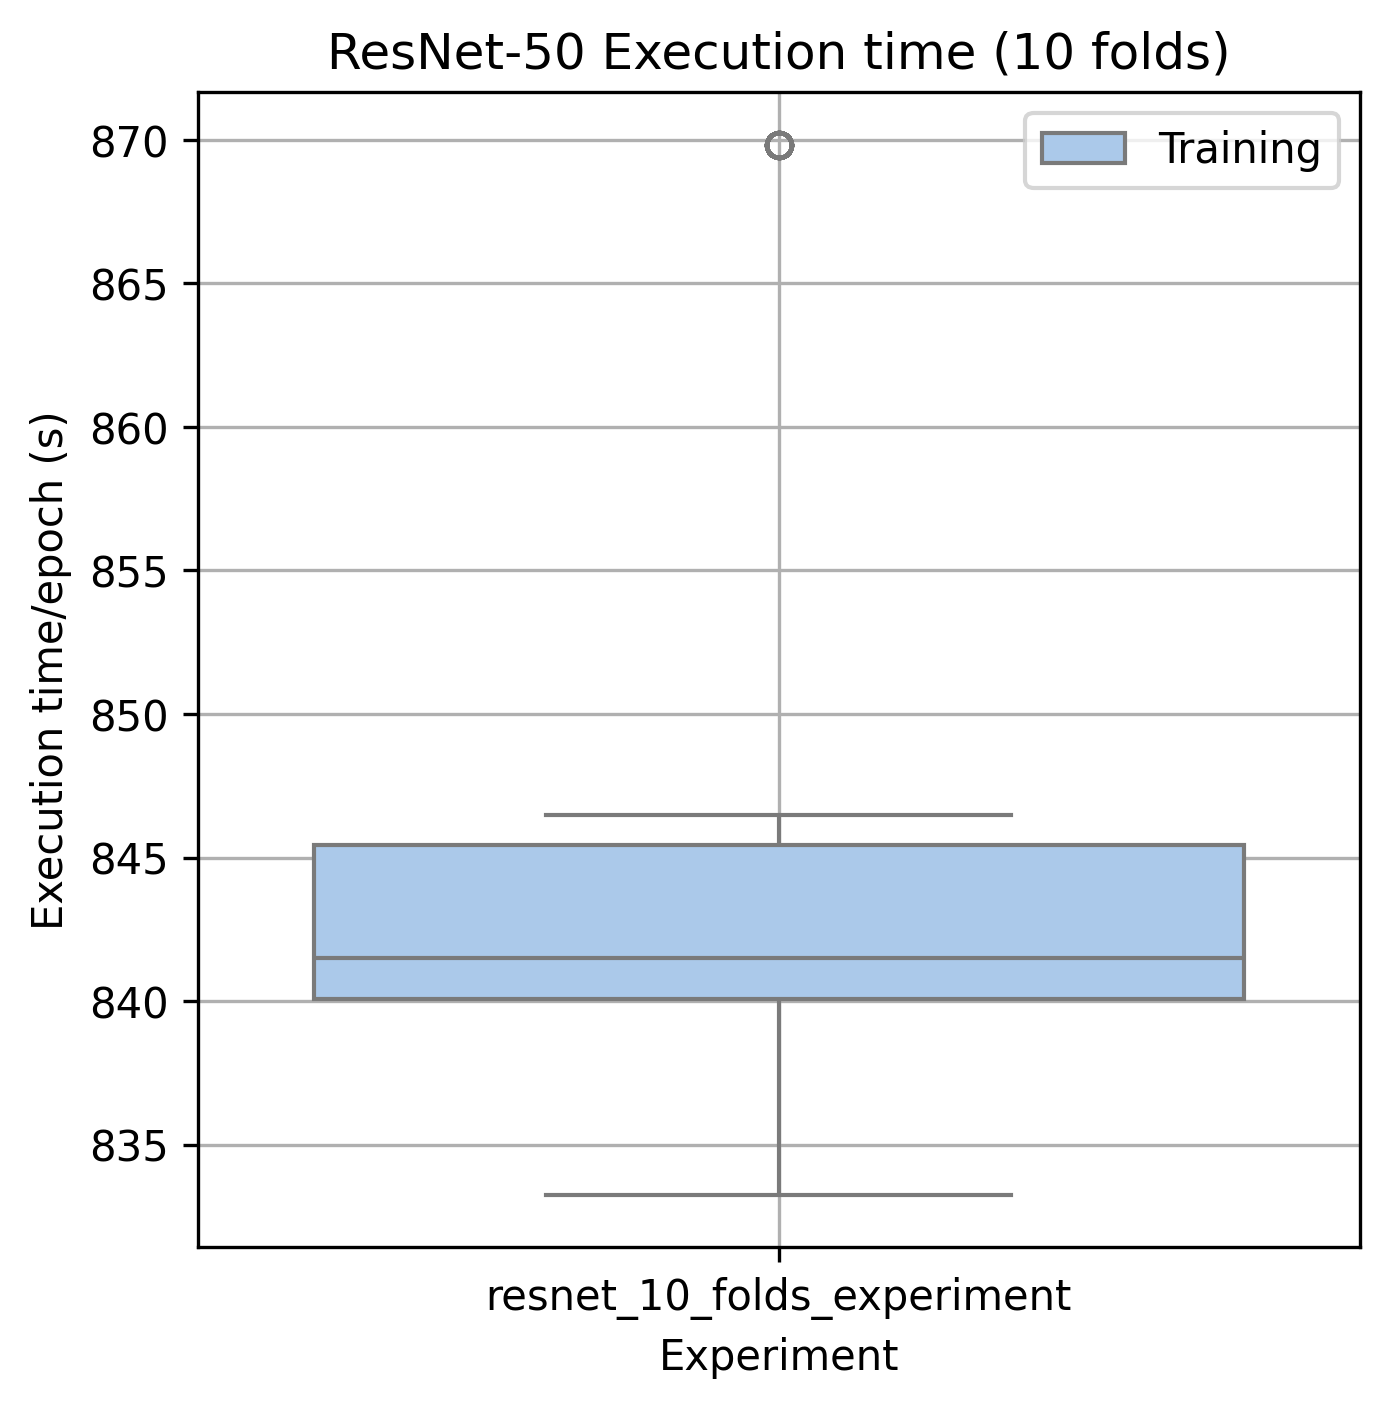

In [85]:
plt.figure(dpi=300, figsize=(5,5))
sns.boxplot(data=df_r_10f, x="experiment_name", y="duration", color=colors[0], label="Training")
plt.grid()
plt.title("ResNet-50 Execution time (10 folds)")
plt.xlabel("Experiment")
plt.ylabel("Execution time/epoch (s)")
plt.savefig("imgs/resnet_10_folds_exec_time_box.png", bbox_inches='tight')
# plt.close()

# Getting best results


In [21]:
df_a_10f.groupby('epoch_idx').agg({"accuracy": "mean", "val_accuracy": "mean", "f1_score": "mean", "val_f1_score": "mean", "loss": "mean", "val_loss": "mean", "precision": "mean", "val_precision": "mean"}).reset_index()

,epoch_idx,accuracy,val_accuracy,f1_score,val_f1_score,loss,val_loss,precision,val_precision
0,0,0.942618,0.950265,0.925894,0.937737,0.181687,0.148723,0.957366,0.955939
1,1,0.963139,0.970403,0.958566,0.966807,0.096281,0.07535,0.969303,0.973557
2,2,0.972846,0.970929,0.970335,0.969831,0.073402,0.085896,0.976322,0.973573
3,3,0.975977,0.981437,0.974441,0.98129,0.062134,0.052893,0.978569,0.983118
4,4,0.98121,0.979861,0.980037,0.979712,0.052614,0.0624,0.98266,0.981417
5,5,0.984633,0.981088,0.983846,0.980851,0.044012,0.053245,0.98592,0.982183
6,6,0.987707,0.978112,0.987086,0.978436,0.035219,0.065987,0.988568,0.979173
7,7,0.987454,0.983363,0.986802,0.98305,0.03242,0.047897,0.988194,0.983795
8,8,0.988582,0.986166,0.988137,0.985791,0.033448,0.053261,0.989377,0.986475
9,9,0.991616,0.987918,0.991201,0.988055,0.023388,0.04205,0.991854,0.988573


In [22]:
full_data.to_clipboard(excel=True, index=True)

# Evaluation results


In [35]:
full_data[full_data["weight_path"].notna()].columns

Index(['experiment_name', 'epochs', 'stage', 'folds', 'experiment_start_time',
       'experiment_end_time', 'experiment_duration', 'experiment_identifier',
       'fold', 'start_time', 'end_time', 'duration', 'identifier',
       'evaluate_results', 'epoch_idx', 'accuracy', 'f1_score', 'loss',
       'precision', 'val_accuracy', 'val_f1_score', 'val_loss',
       'val_precision', 'weight_path', 'evaluate_loss', 'f1_class_0',
       'f1_class_1', 'f1_class_2', 'f1_class_3'],
      dtype='object')

In [37]:
full_data[full_data["weight_path"].notna()][['experiment_name', 'epochs', 'stage', 'folds',
    'fold', 'duration', 'epoch_idx', 'f1_score', 'loss',
    'val_f1_score', 'val_loss',
    'evaluate_loss', 'f1_class_0', 'f1_class_1', 'f1_class_2', 'f1_class_3']].to_clipboard(excel=True, index=True)